<a href="https://colab.research.google.com/github/duchuy3007/CS114.L22.KHCL./blob/main/VietnameseHandwritingCharacterClassification_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đọc ảnh, xử lí và dùng HOG rút trích đặc trưng**

In [ ]:
# Mount Drive từ google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import một số thư viện cần thiết
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd

**Read data**

In [ ]:
# Lấy đường dẫn và nhãn
path_X_train = '/content/drive/MyDrive/Dataset/TrimImage/X_train_16x16_hog.csv'
path_Y_train = '/content/drive/MyDrive/Dataset/TrimImage/Y_train_16x16_hog.csv'
path_X_vali = '/content/drive/MyDrive/Dataset/TrimImage/X_val_16x16_hog.csv'
path_Y_vali = '/content/drive/MyDrive/Dataset/TrimImage/Y_val_16x16_hog.csv'
path_X_test = '/content/drive/MyDrive/Dataset/TrimImage/X_test_16x16_hog.csv'
path_Y_test = '/content/drive/MyDrive/Dataset/TrimImage/Y_test_16x16_hog.csv'


labels = os.listdir('/content/drive/MyDrive/Dataset/Dataset')
labels = sorted(labels)
print(labels)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9']


In [ ]:
# Đọc và chuyển dữ liệu sang ndarray
X_train = pd.read_csv(path_X_train,header=None).to_numpy()
Y_train = pd.read_csv(path_Y_train,header=None).to_numpy()
X_vali = pd.read_csv(path_X_vali,header=None).to_numpy()
Y_vali = pd.read_csv(path_Y_vali,header=None).to_numpy()
X_test = pd.read_csv(path_X_test,header=None).to_numpy()
Y_test = pd.read_csv(path_Y_test,header=None).to_numpy()

In [ ]:
# Kích thước dữ liệu
print(len(X_train),len(Y_train))
print(len(X_vali),len(Y_vali))
print(len(X_test),len(Y_test))
print(X_train)

24585 24585
5275 5275
5321 5321
[[0.01383657 0.12375802 0.         ... 0.         0.         0.        ]
 [0.13081244 0.         0.         ... 0.         0.         0.        ]
 [0.00300542 0.15515079 0.         ... 0.         0.         0.        ]
 ...
 [0.01888203 0.         0.         ... 0.         0.         0.        ]
 [0.00897853 0.         0.         ... 0.         0.         0.        ]
 [0.37217896 0.         0.         ... 0.         0.         0.        ]]


**Dùng các model để huấn luyện và dự đoán**


In [ ]:
# Chỉnh size các khung hiển thị ra màn hình
from matplotlib import rcParams
rcParams['figure.figsize'] = 40,40

**Sử dụng model Bernouli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.4729857819905213


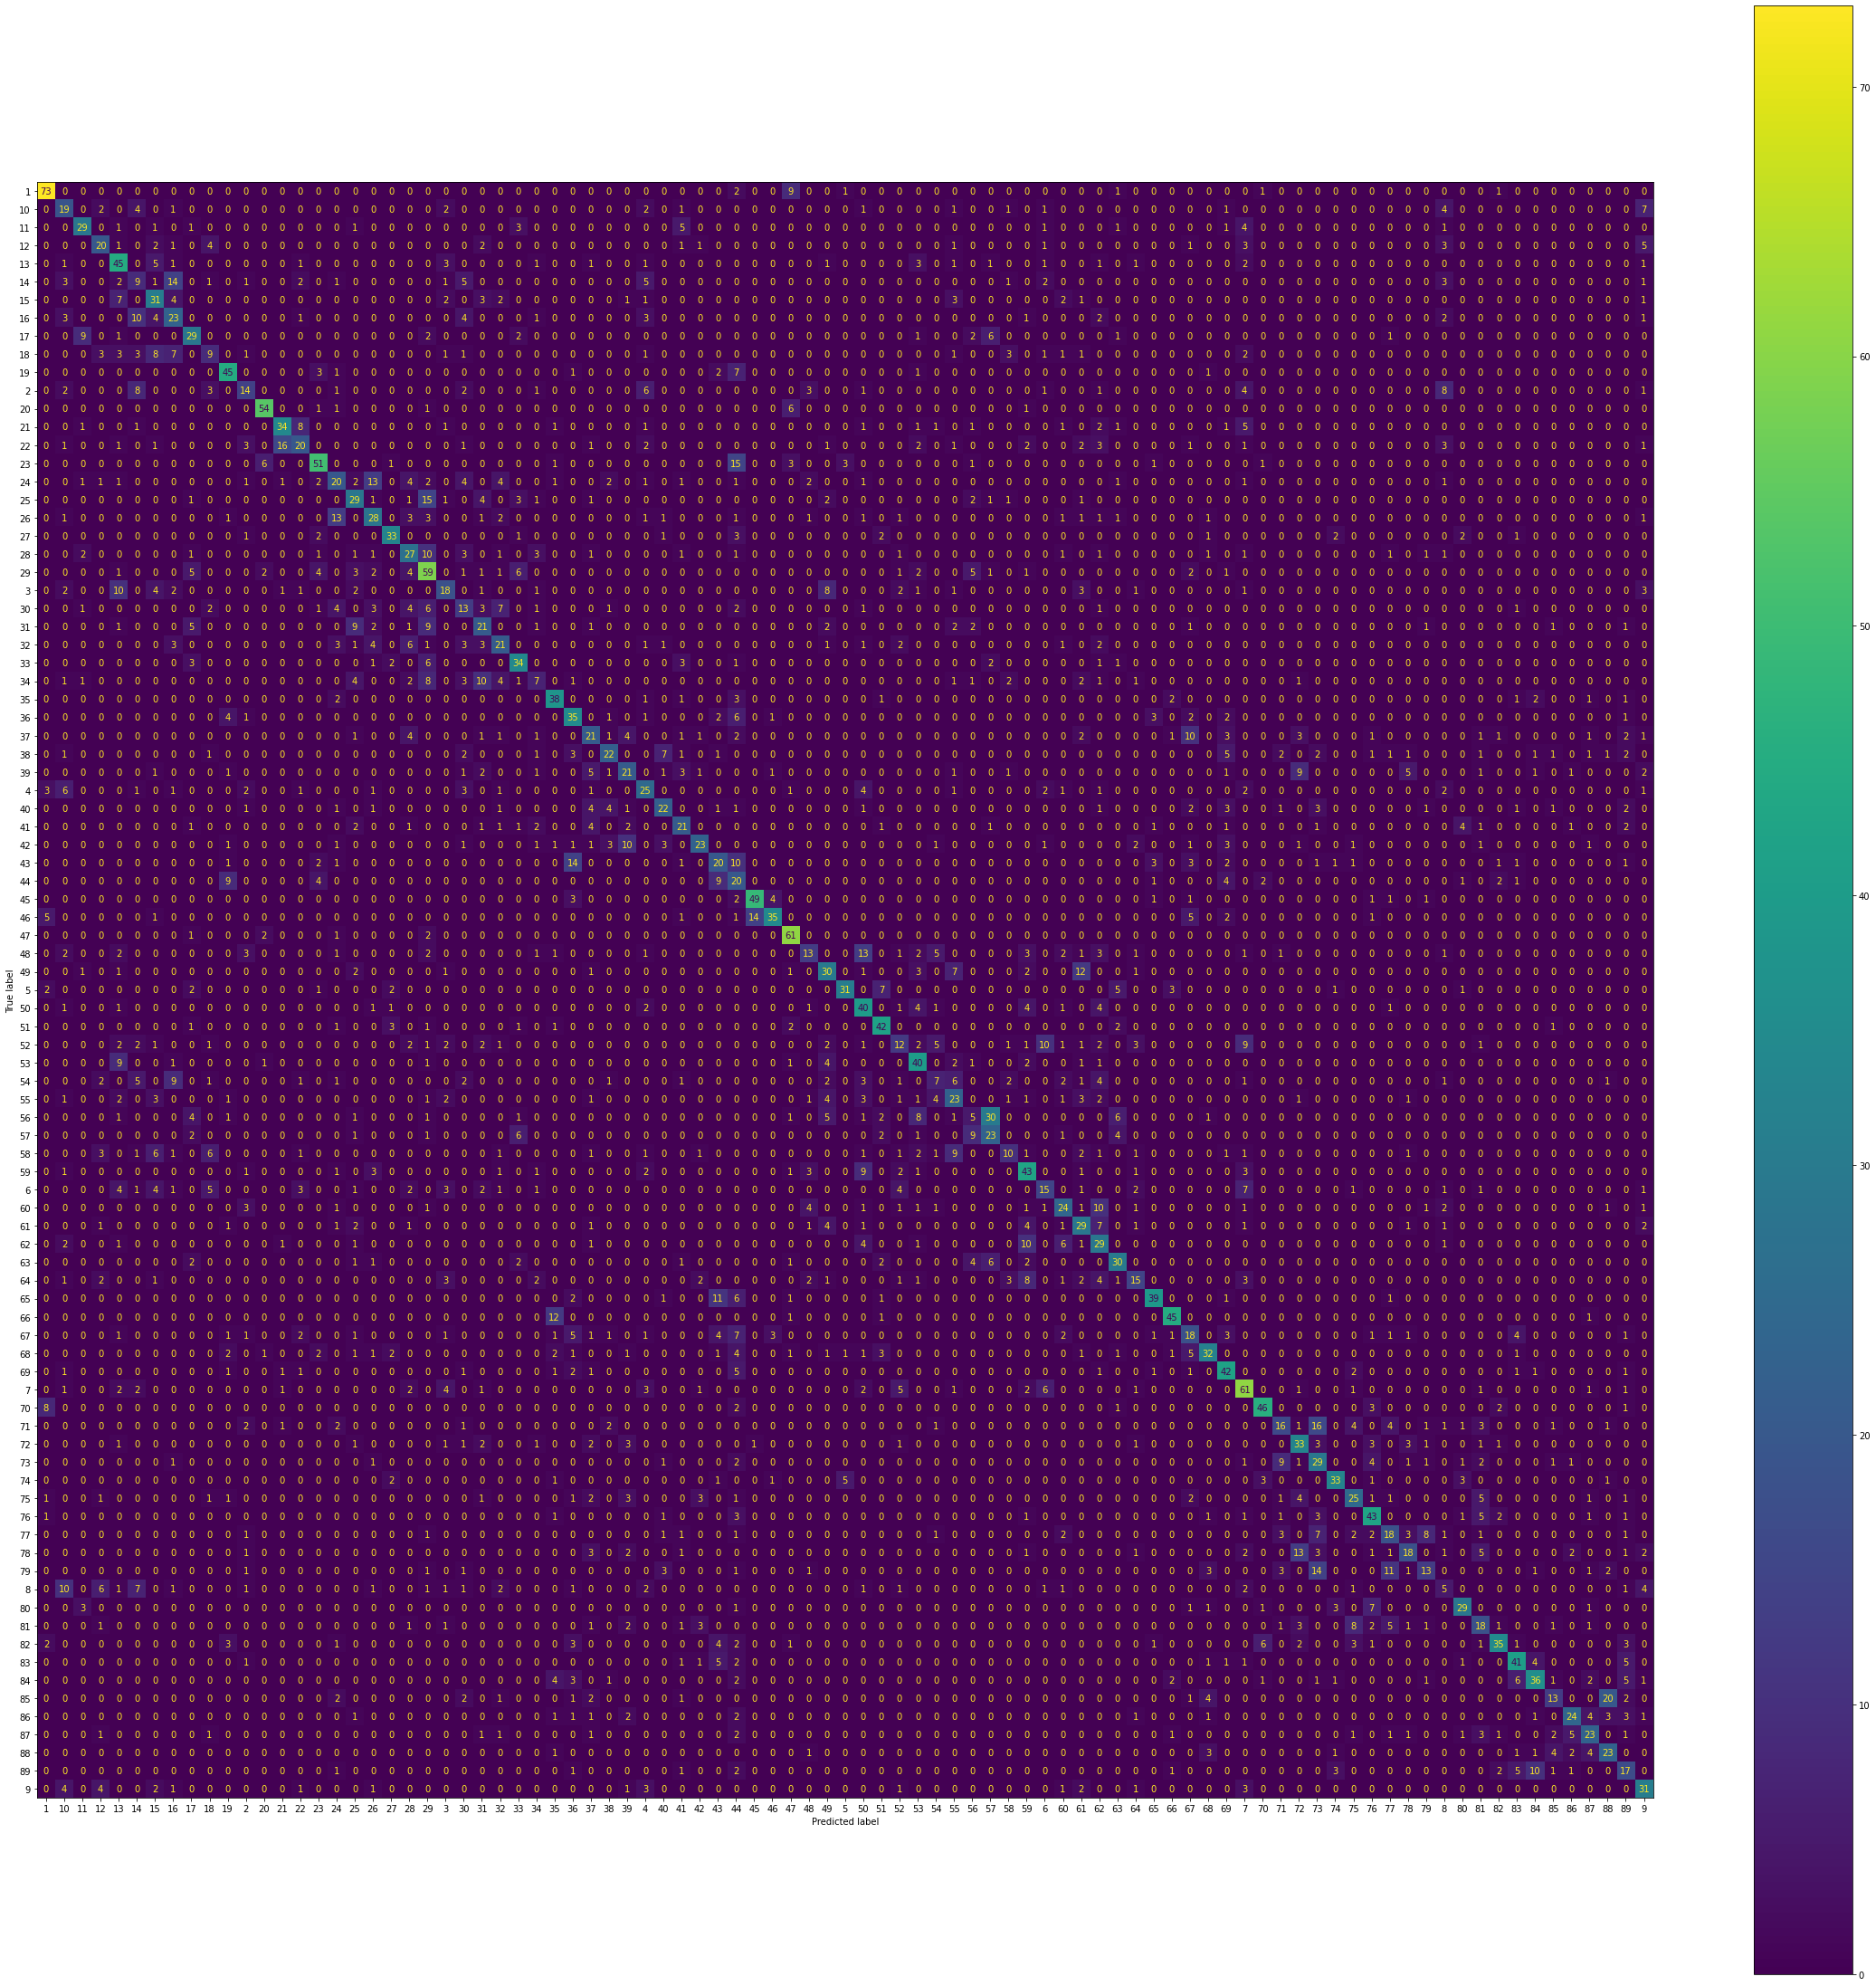

              precision    recall  f1-score   support

           1       0.77      0.83      0.80        88
          10       0.30      0.40      0.34        47
          11       0.60      0.59      0.60        49
          12       0.43      0.43      0.43        46
          13       0.44      0.63      0.52        71
          14       0.17      0.17      0.17        52
          15       0.41      0.53      0.46        58
          16       0.32      0.42      0.36        55
          17       0.50      0.54      0.52        54
          18       0.26      0.20      0.22        46
          19       0.62      0.74      0.67        61
           2       0.35      0.25      0.29        56
          20       0.82      0.84      0.83        64
          21       0.61      0.56      0.58        61
          22       0.47      0.32      0.38        63
          23       0.69      0.61      0.65        83
          24       0.32      0.29      0.31        68
          25       0.43    

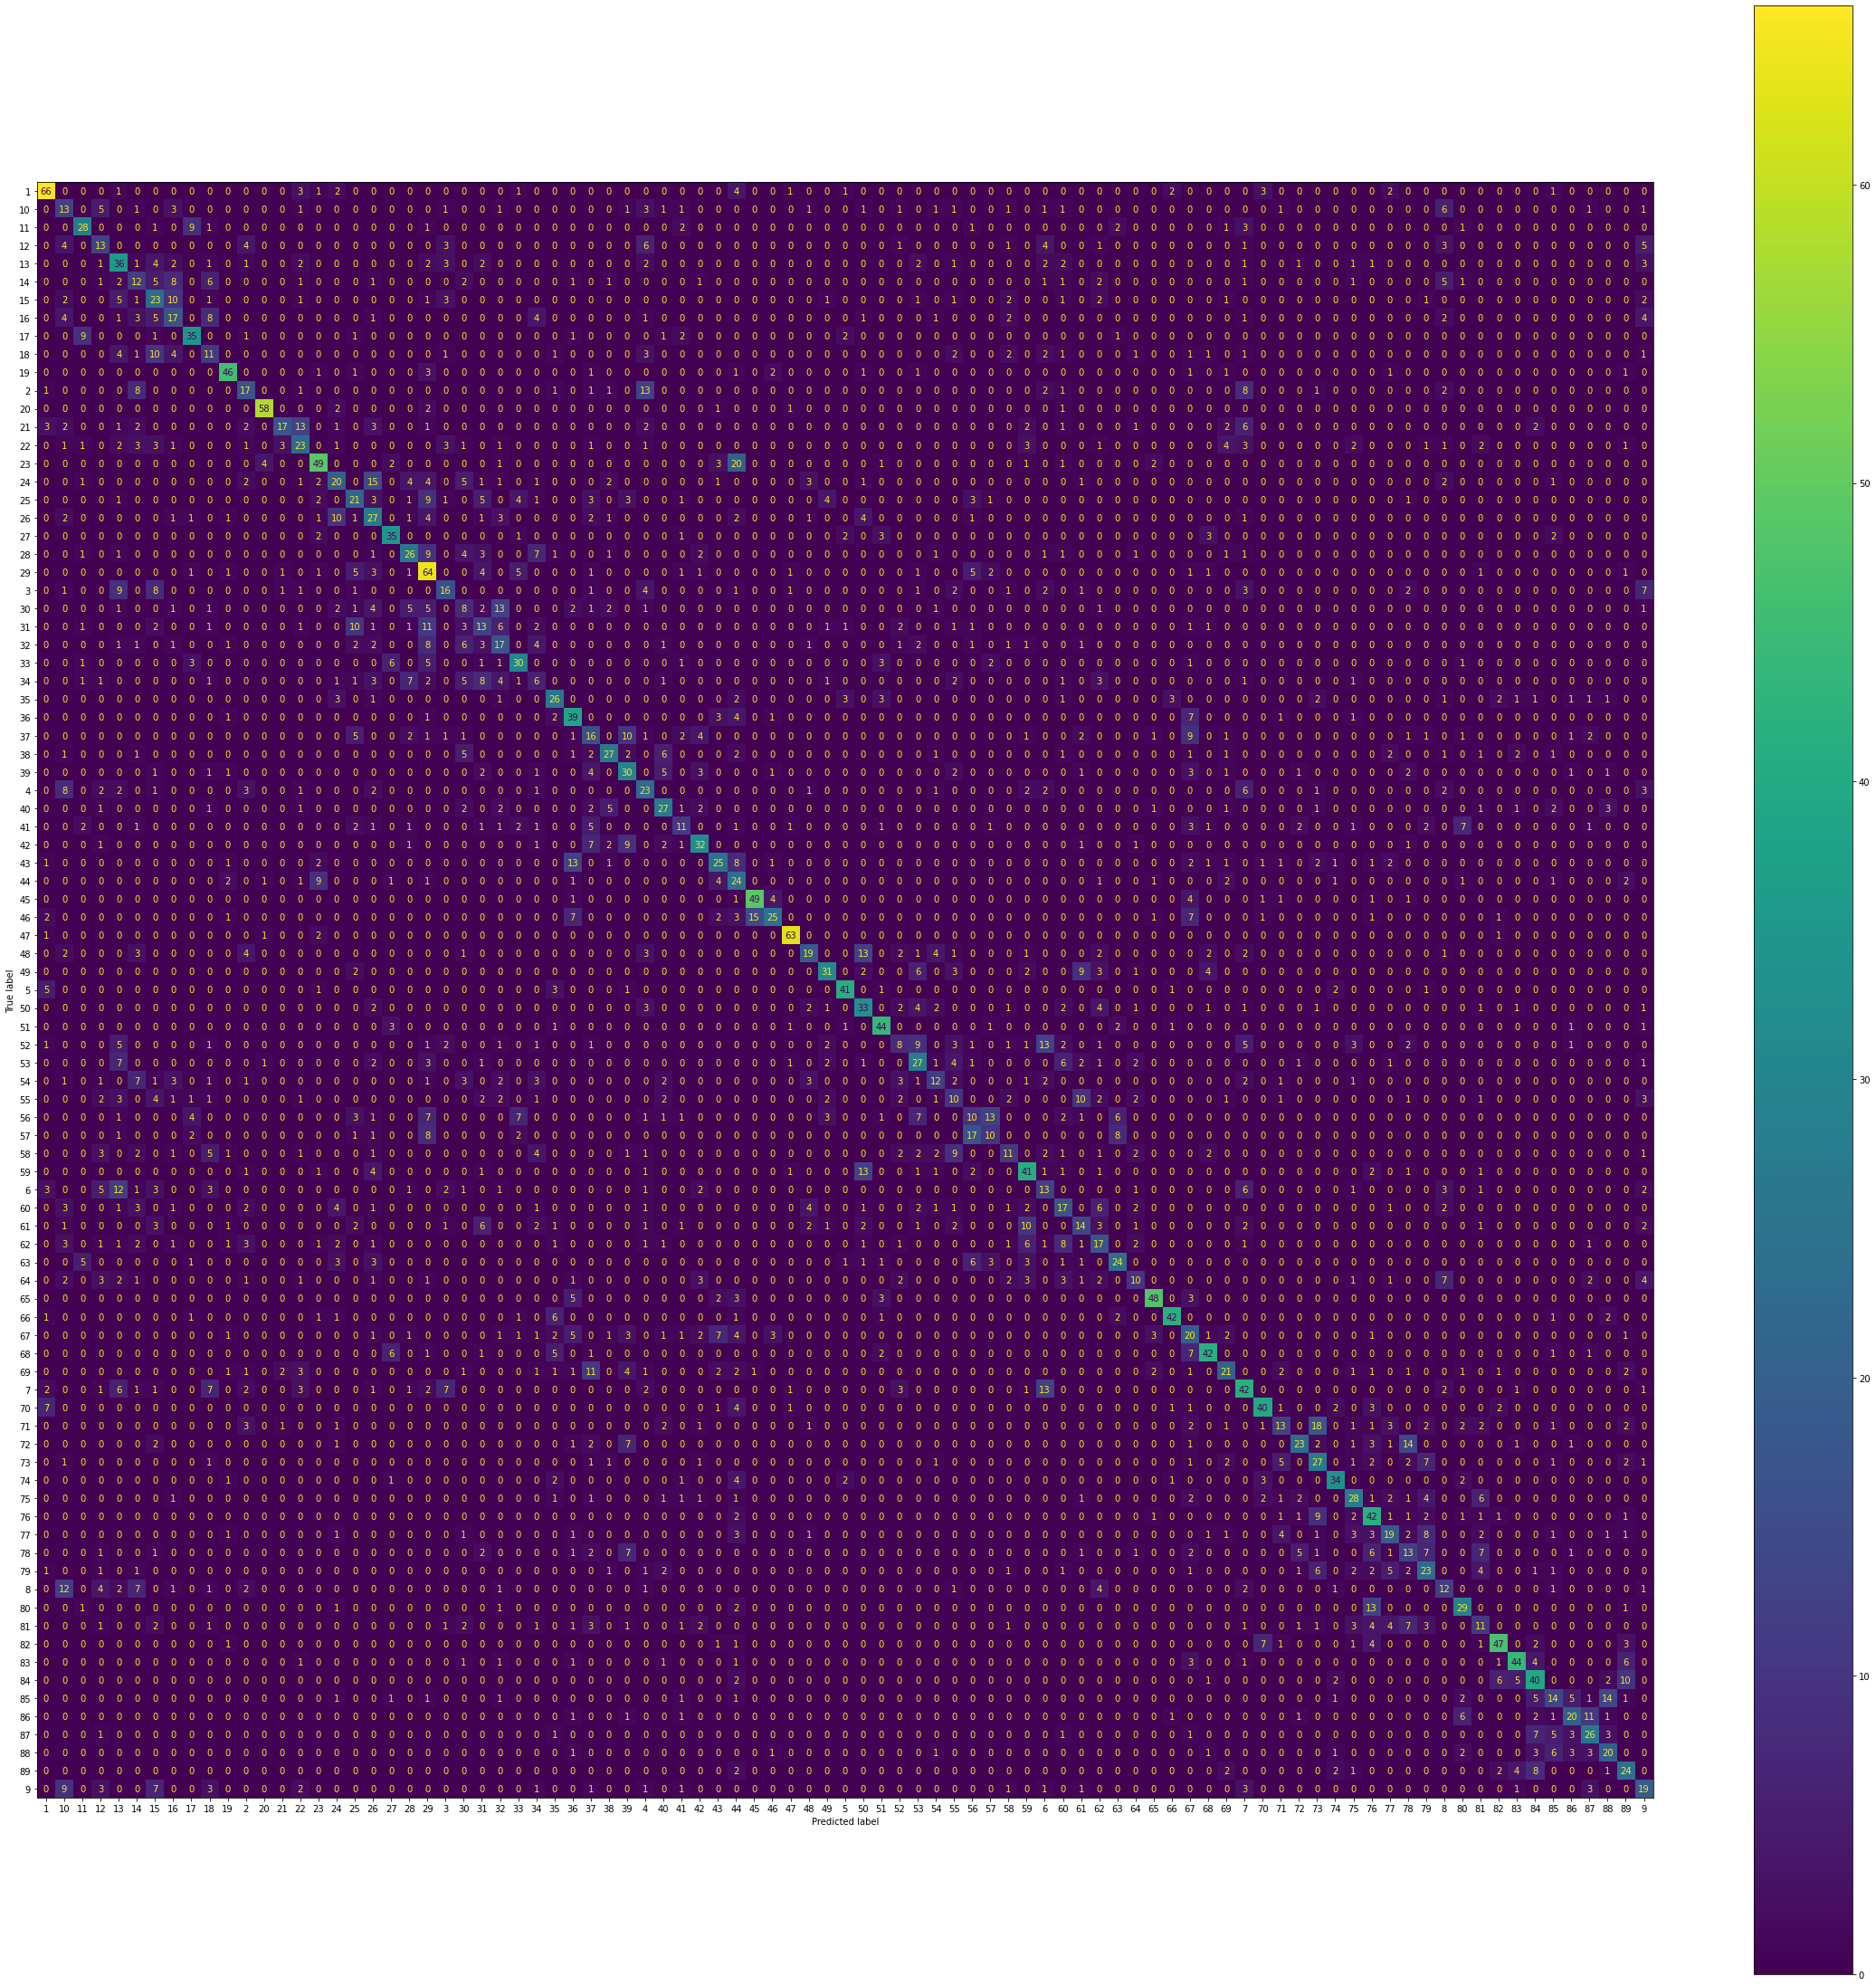

              precision    recall  f1-score   support

           1       0.70      0.75      0.73        88
          10       0.18      0.27      0.22        48
          11       0.55      0.56      0.55        50
          12       0.25      0.28      0.27        46
          13       0.33      0.51      0.40        71
          14       0.19      0.23      0.21        53
          15       0.26      0.39      0.31        59
          16       0.30      0.31      0.30        55
          17       0.60      0.65      0.62        54
          18       0.19      0.23      0.21        47
          19       0.73      0.75      0.74        61
           2       0.33      0.30      0.31        57
          20       0.89      0.89      0.89        65
          21       0.68      0.28      0.40        61
          22       0.37      0.36      0.36        64
          23       0.64      0.58      0.61        84
          24       0.35      0.29      0.32        68
          25       0.36    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

**Sử dụng model Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.6132701421800948


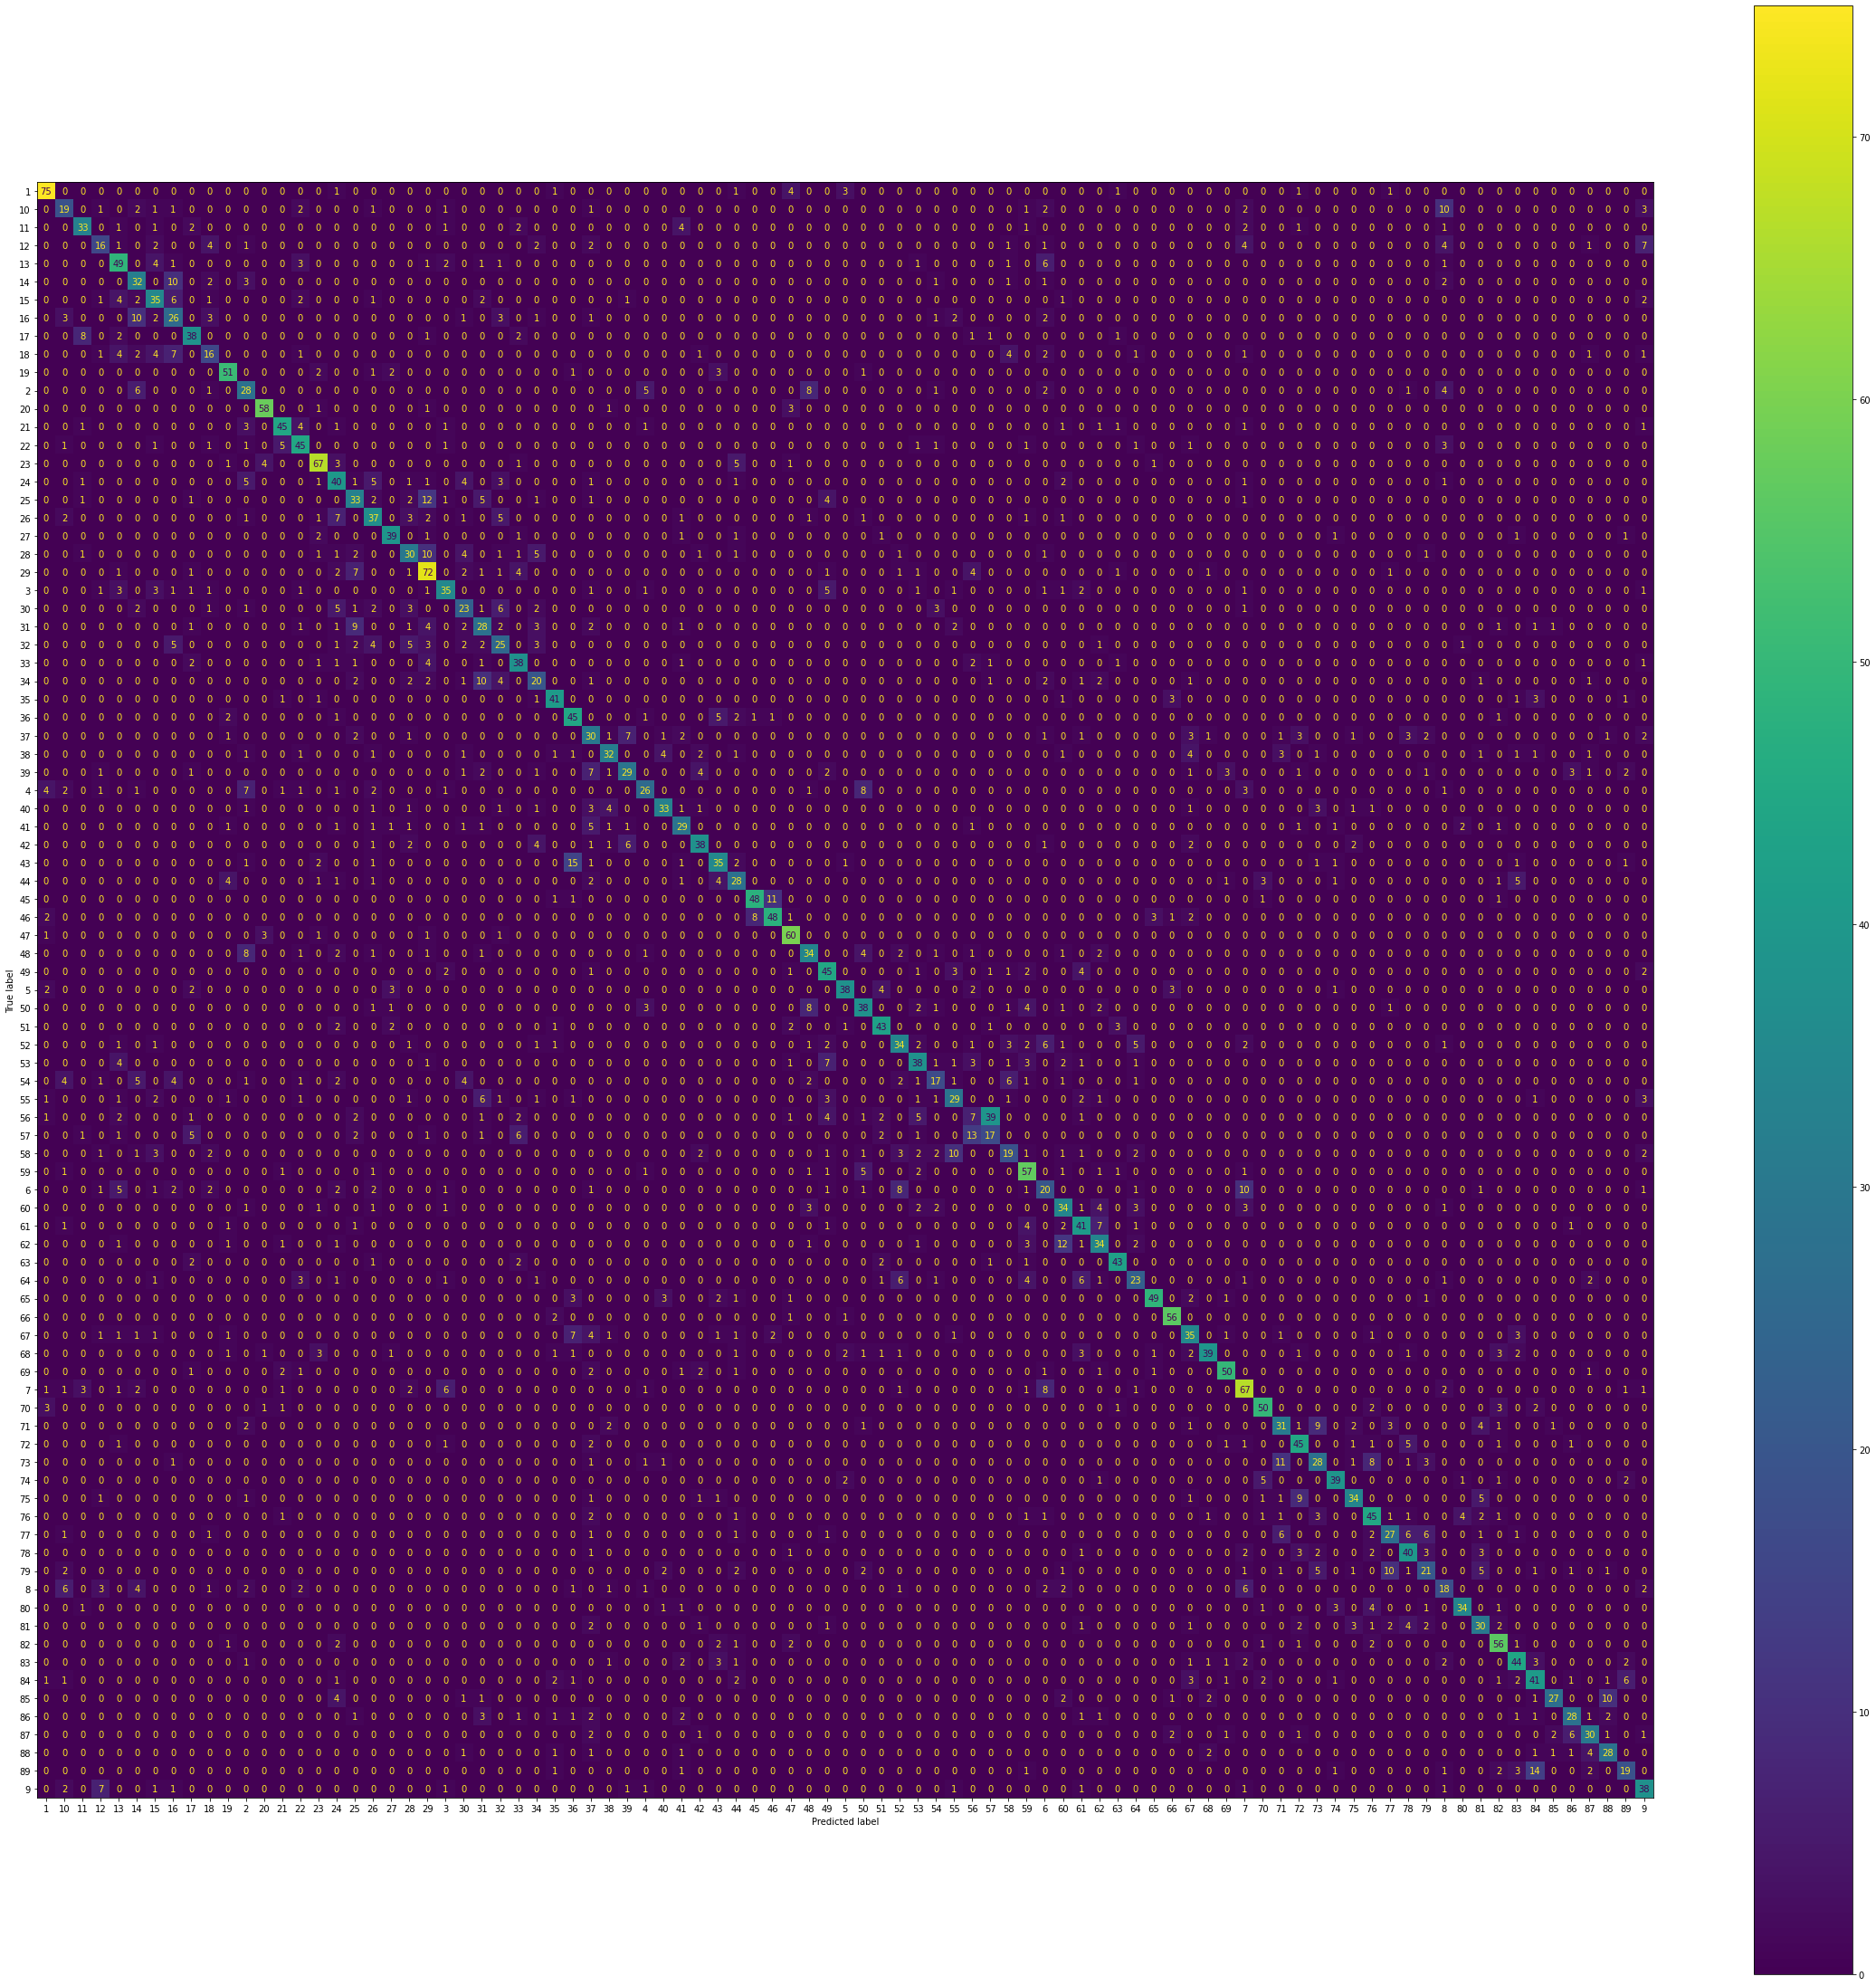

              precision    recall  f1-score   support

           1       0.82      0.85      0.84        88
          10       0.41      0.40      0.41        47
          11       0.66      0.67      0.67        49
          12       0.43      0.35      0.39        46
          13       0.59      0.69      0.64        71
          14       0.46      0.62      0.52        52
          15       0.56      0.60      0.58        58
          16       0.40      0.47      0.43        55
          17       0.66      0.70      0.68        54
          18       0.44      0.35      0.39        46
          19       0.77      0.84      0.80        61
           2       0.41      0.50      0.45        56
          20       0.87      0.91      0.89        64
          21       0.76      0.74      0.75        61
          22       0.64      0.71      0.68        63
          23       0.79      0.81      0.80        83
          24       0.48      0.59      0.53        68
          25       0.50    

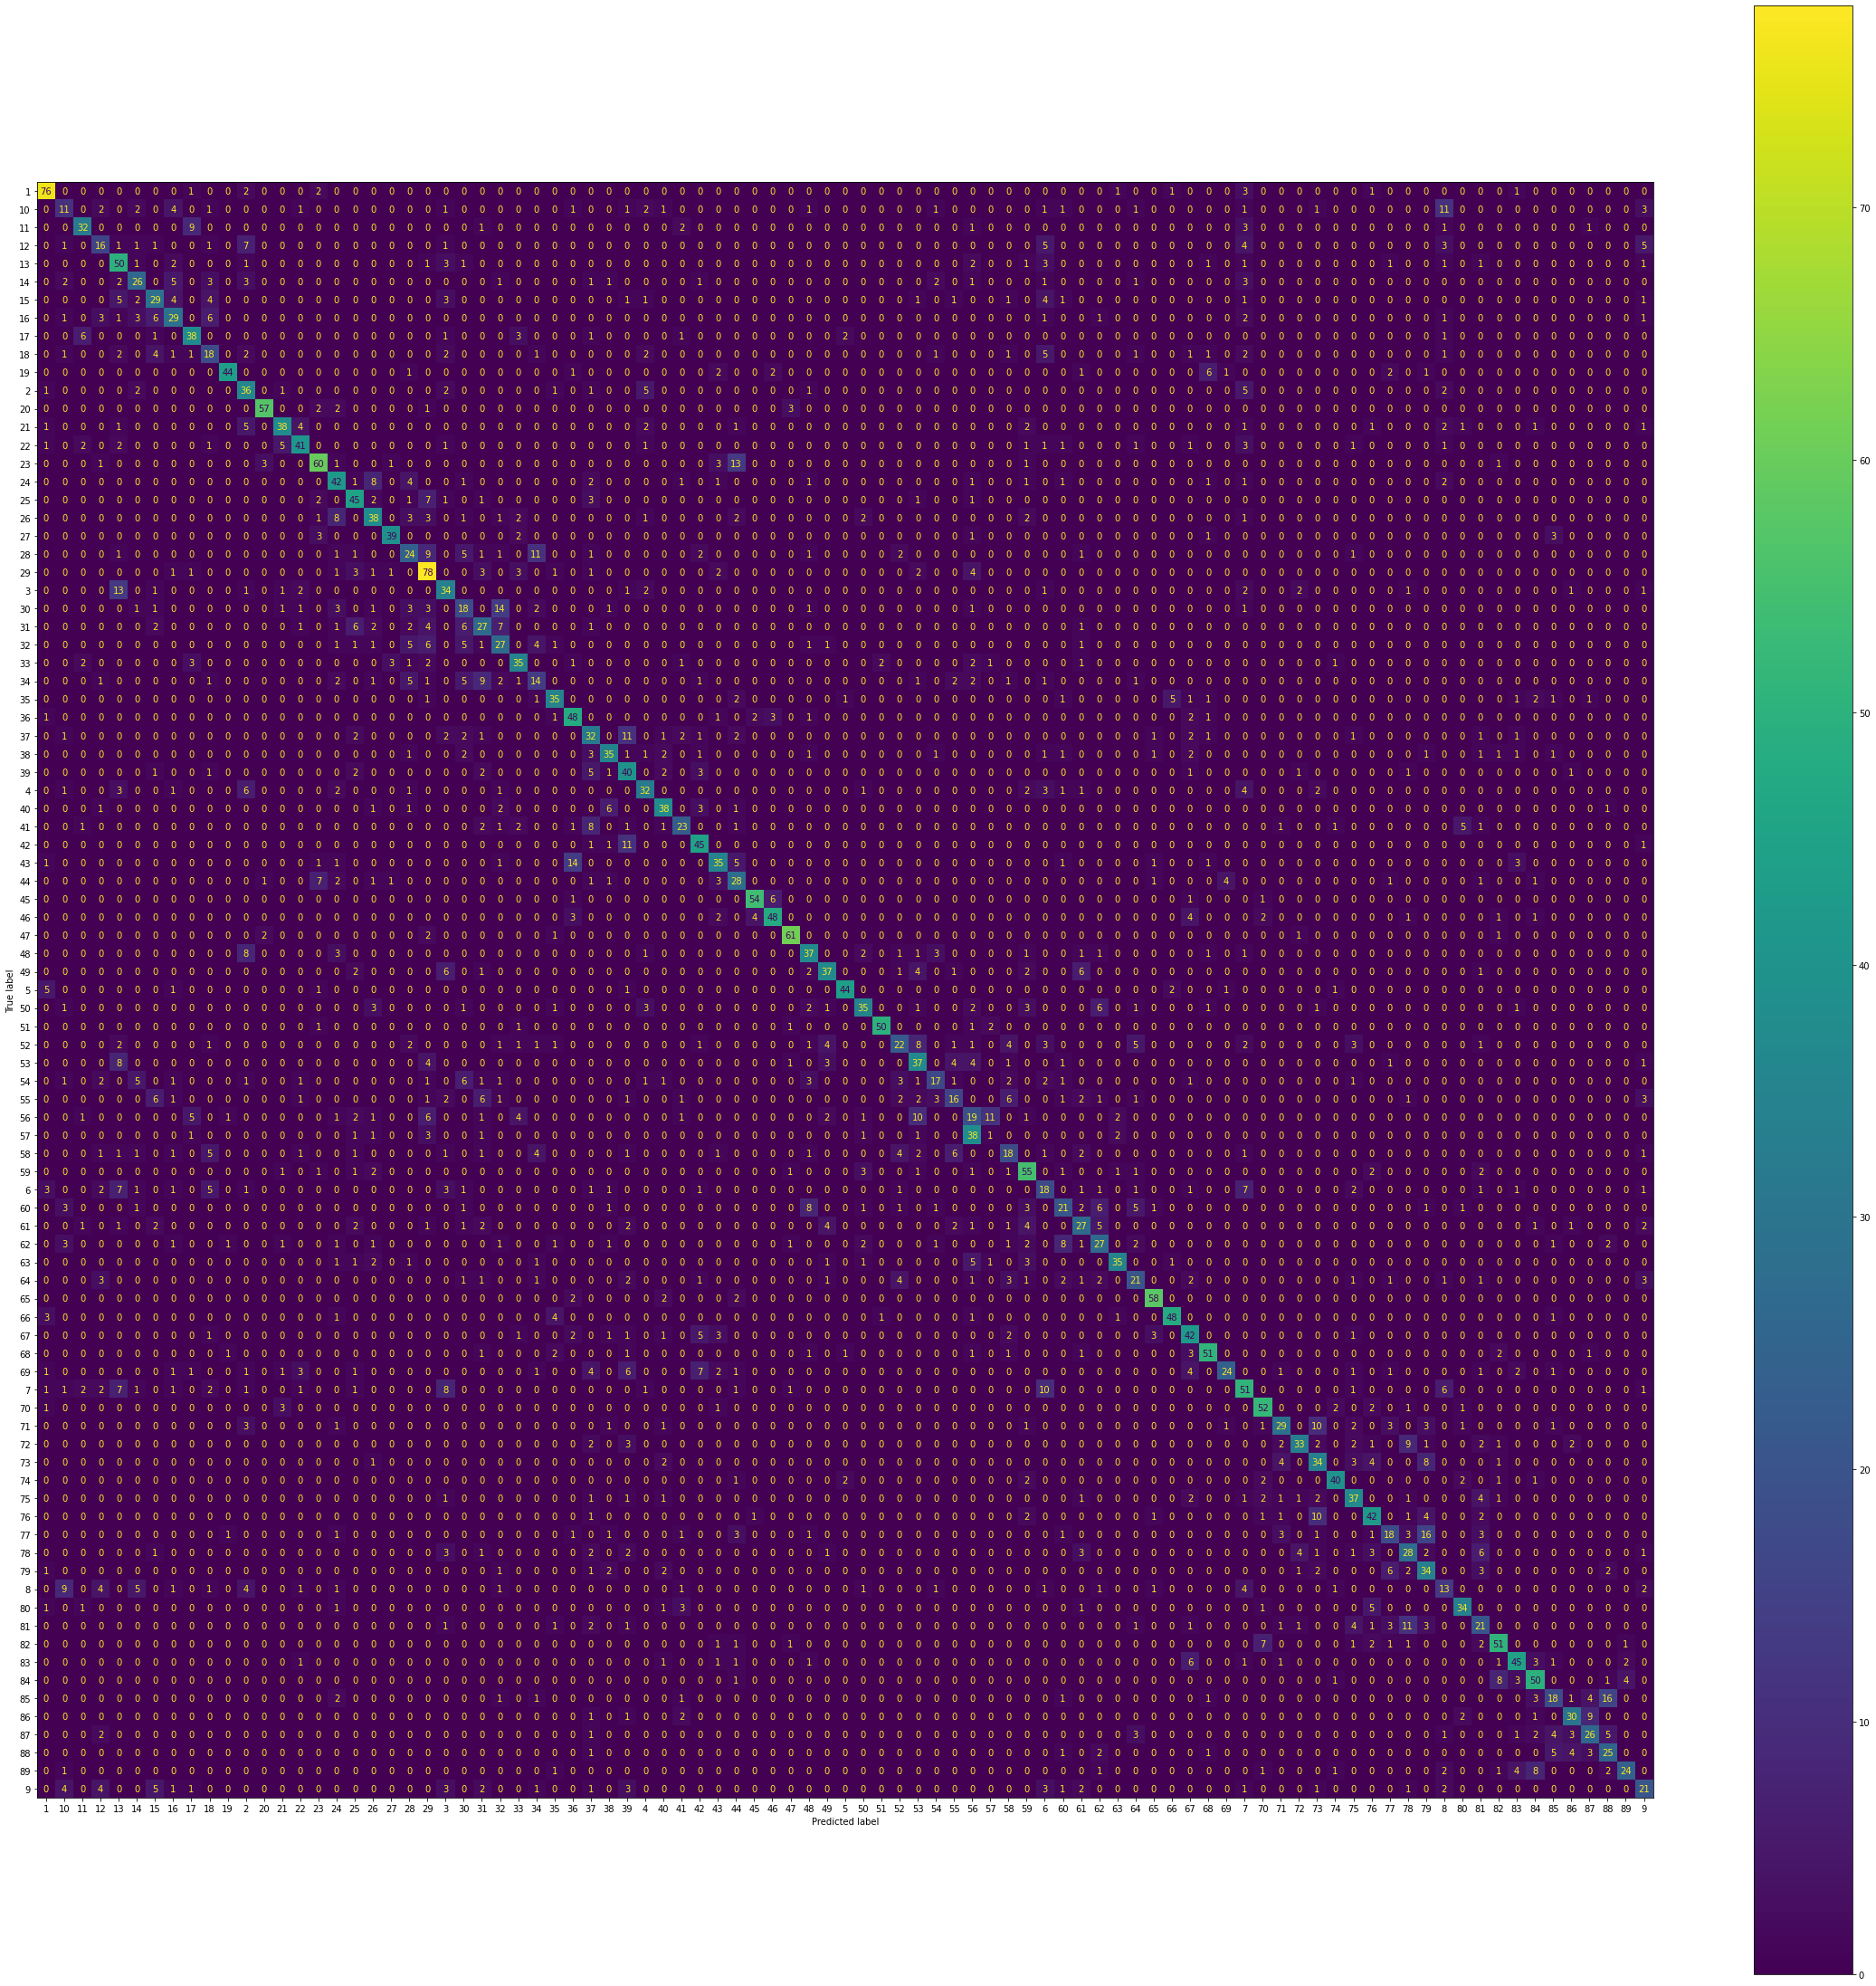

              precision    recall  f1-score   support

           1       0.78      0.86      0.82        88
          10       0.27      0.23      0.25        48
          11       0.67      0.64      0.65        50
          12       0.36      0.35      0.36        46
          13       0.47      0.70      0.56        71
          14       0.50      0.49      0.50        53
          15       0.48      0.49      0.49        59
          16       0.51      0.53      0.52        55
          17       0.62      0.70      0.66        54
          18       0.35      0.38      0.37        47
          19       0.92      0.72      0.81        61
           2       0.44      0.63      0.52        57
          20       0.90      0.88      0.89        65
          21       0.73      0.62      0.67        61
          22       0.69      0.64      0.67        64
          23       0.74      0.71      0.73        84
          24       0.53      0.62      0.57        68
          25       0.62    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

**Sử dụng model SVM**

**Linear kernel**

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1000,kernel='linear')
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.6460663507109005


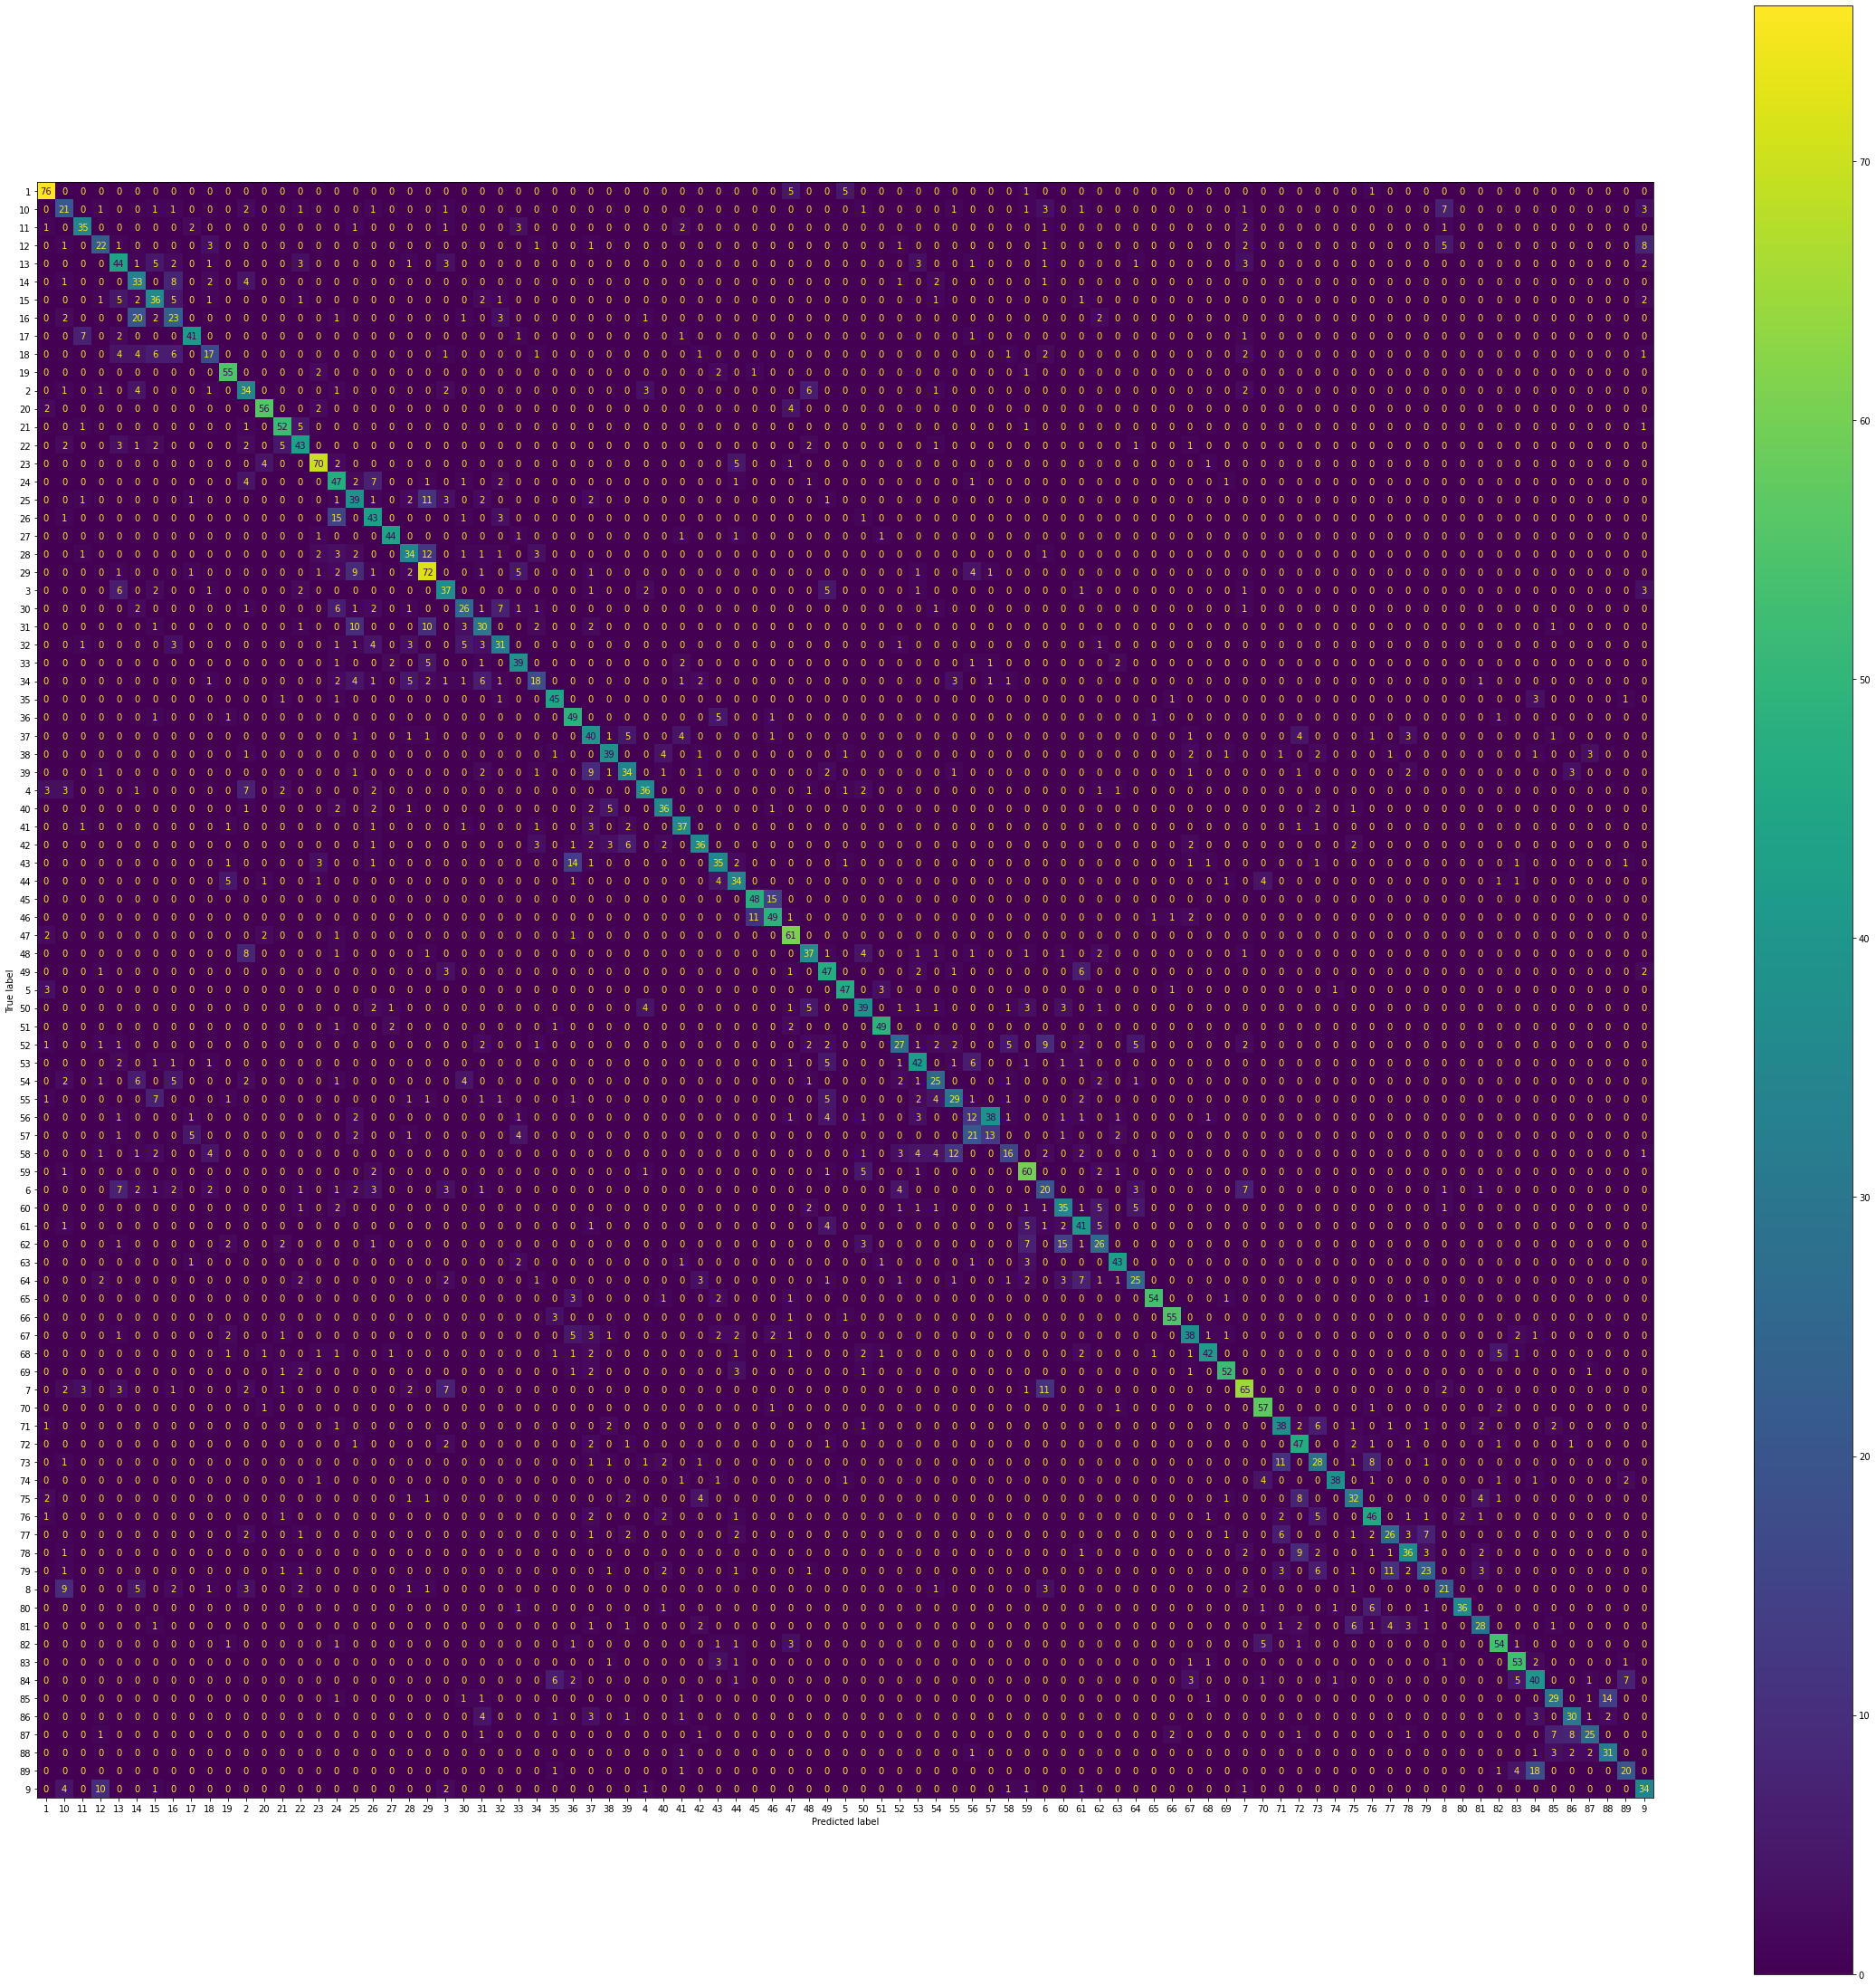

              precision    recall  f1-score   support

           1       0.82      0.86      0.84        88
          10       0.39      0.45      0.42        47
          11       0.70      0.71      0.71        49
          12       0.51      0.48      0.49        46
          13       0.53      0.62      0.57        71
          14       0.40      0.63      0.49        52
          15       0.52      0.62      0.57        58
          16       0.39      0.42      0.40        55
          17       0.79      0.76      0.77        54
          18       0.49      0.37      0.42        46
          19       0.79      0.90      0.84        61
           2       0.46      0.61      0.52        56
          20       0.86      0.88      0.87        64
          21       0.78      0.85      0.81        61
          22       0.65      0.68      0.67        63
          23       0.83      0.84      0.84        83
          24       0.49      0.69      0.57        68
          25       0.50    

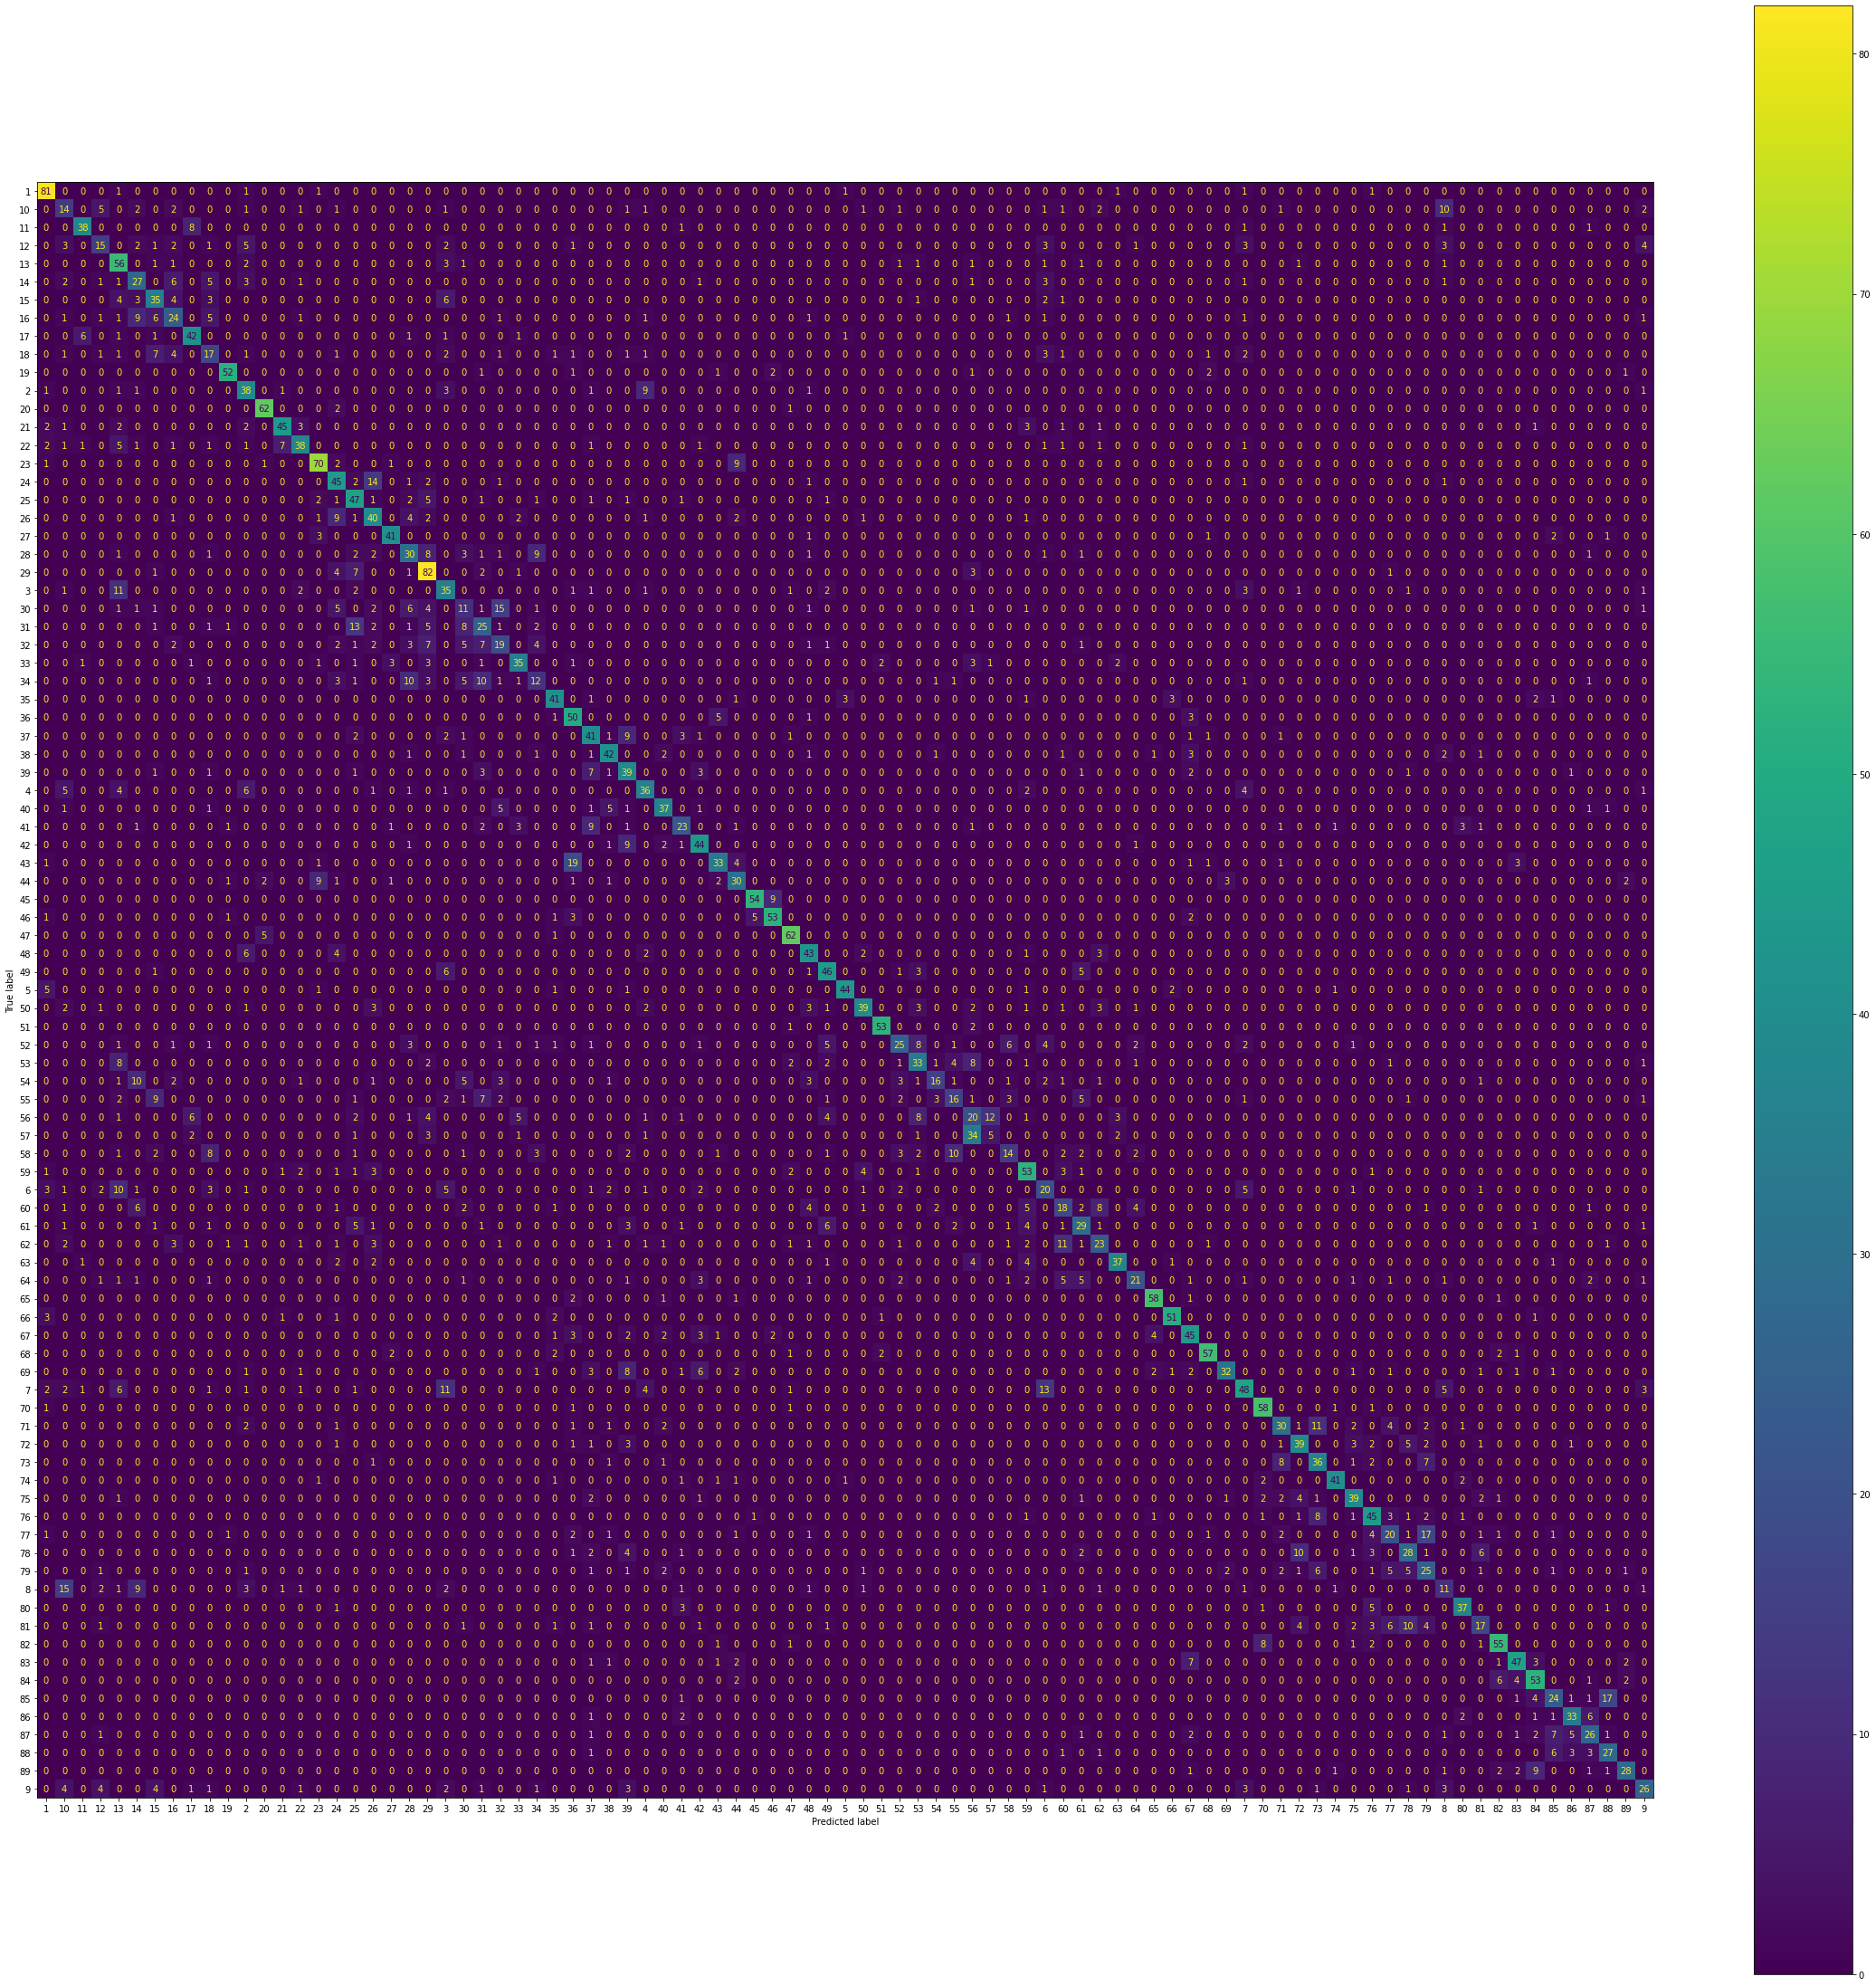

              precision    recall  f1-score   support

           1       0.77      0.92      0.84        88
          10       0.24      0.29      0.26        48
          11       0.79      0.76      0.78        50
          12       0.42      0.33      0.37        46
          13       0.46      0.79      0.58        71
          14       0.36      0.51      0.43        53
          15       0.49      0.59      0.53        59
          16       0.45      0.44      0.44        55
          17       0.70      0.78      0.74        54
          18       0.32      0.36      0.34        47
          19       0.90      0.85      0.87        61
           2       0.49      0.67      0.57        57
          20       0.89      0.95      0.92        65
          21       0.80      0.74      0.77        61
          22       0.70      0.59      0.64        64
          23       0.78      0.83      0.80        84
          24       0.51      0.66      0.57        68
          25       0.51    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

**Polynomial kernel** *văn bản in nghiêng*

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1000,kernel='poly')
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.696872037914692


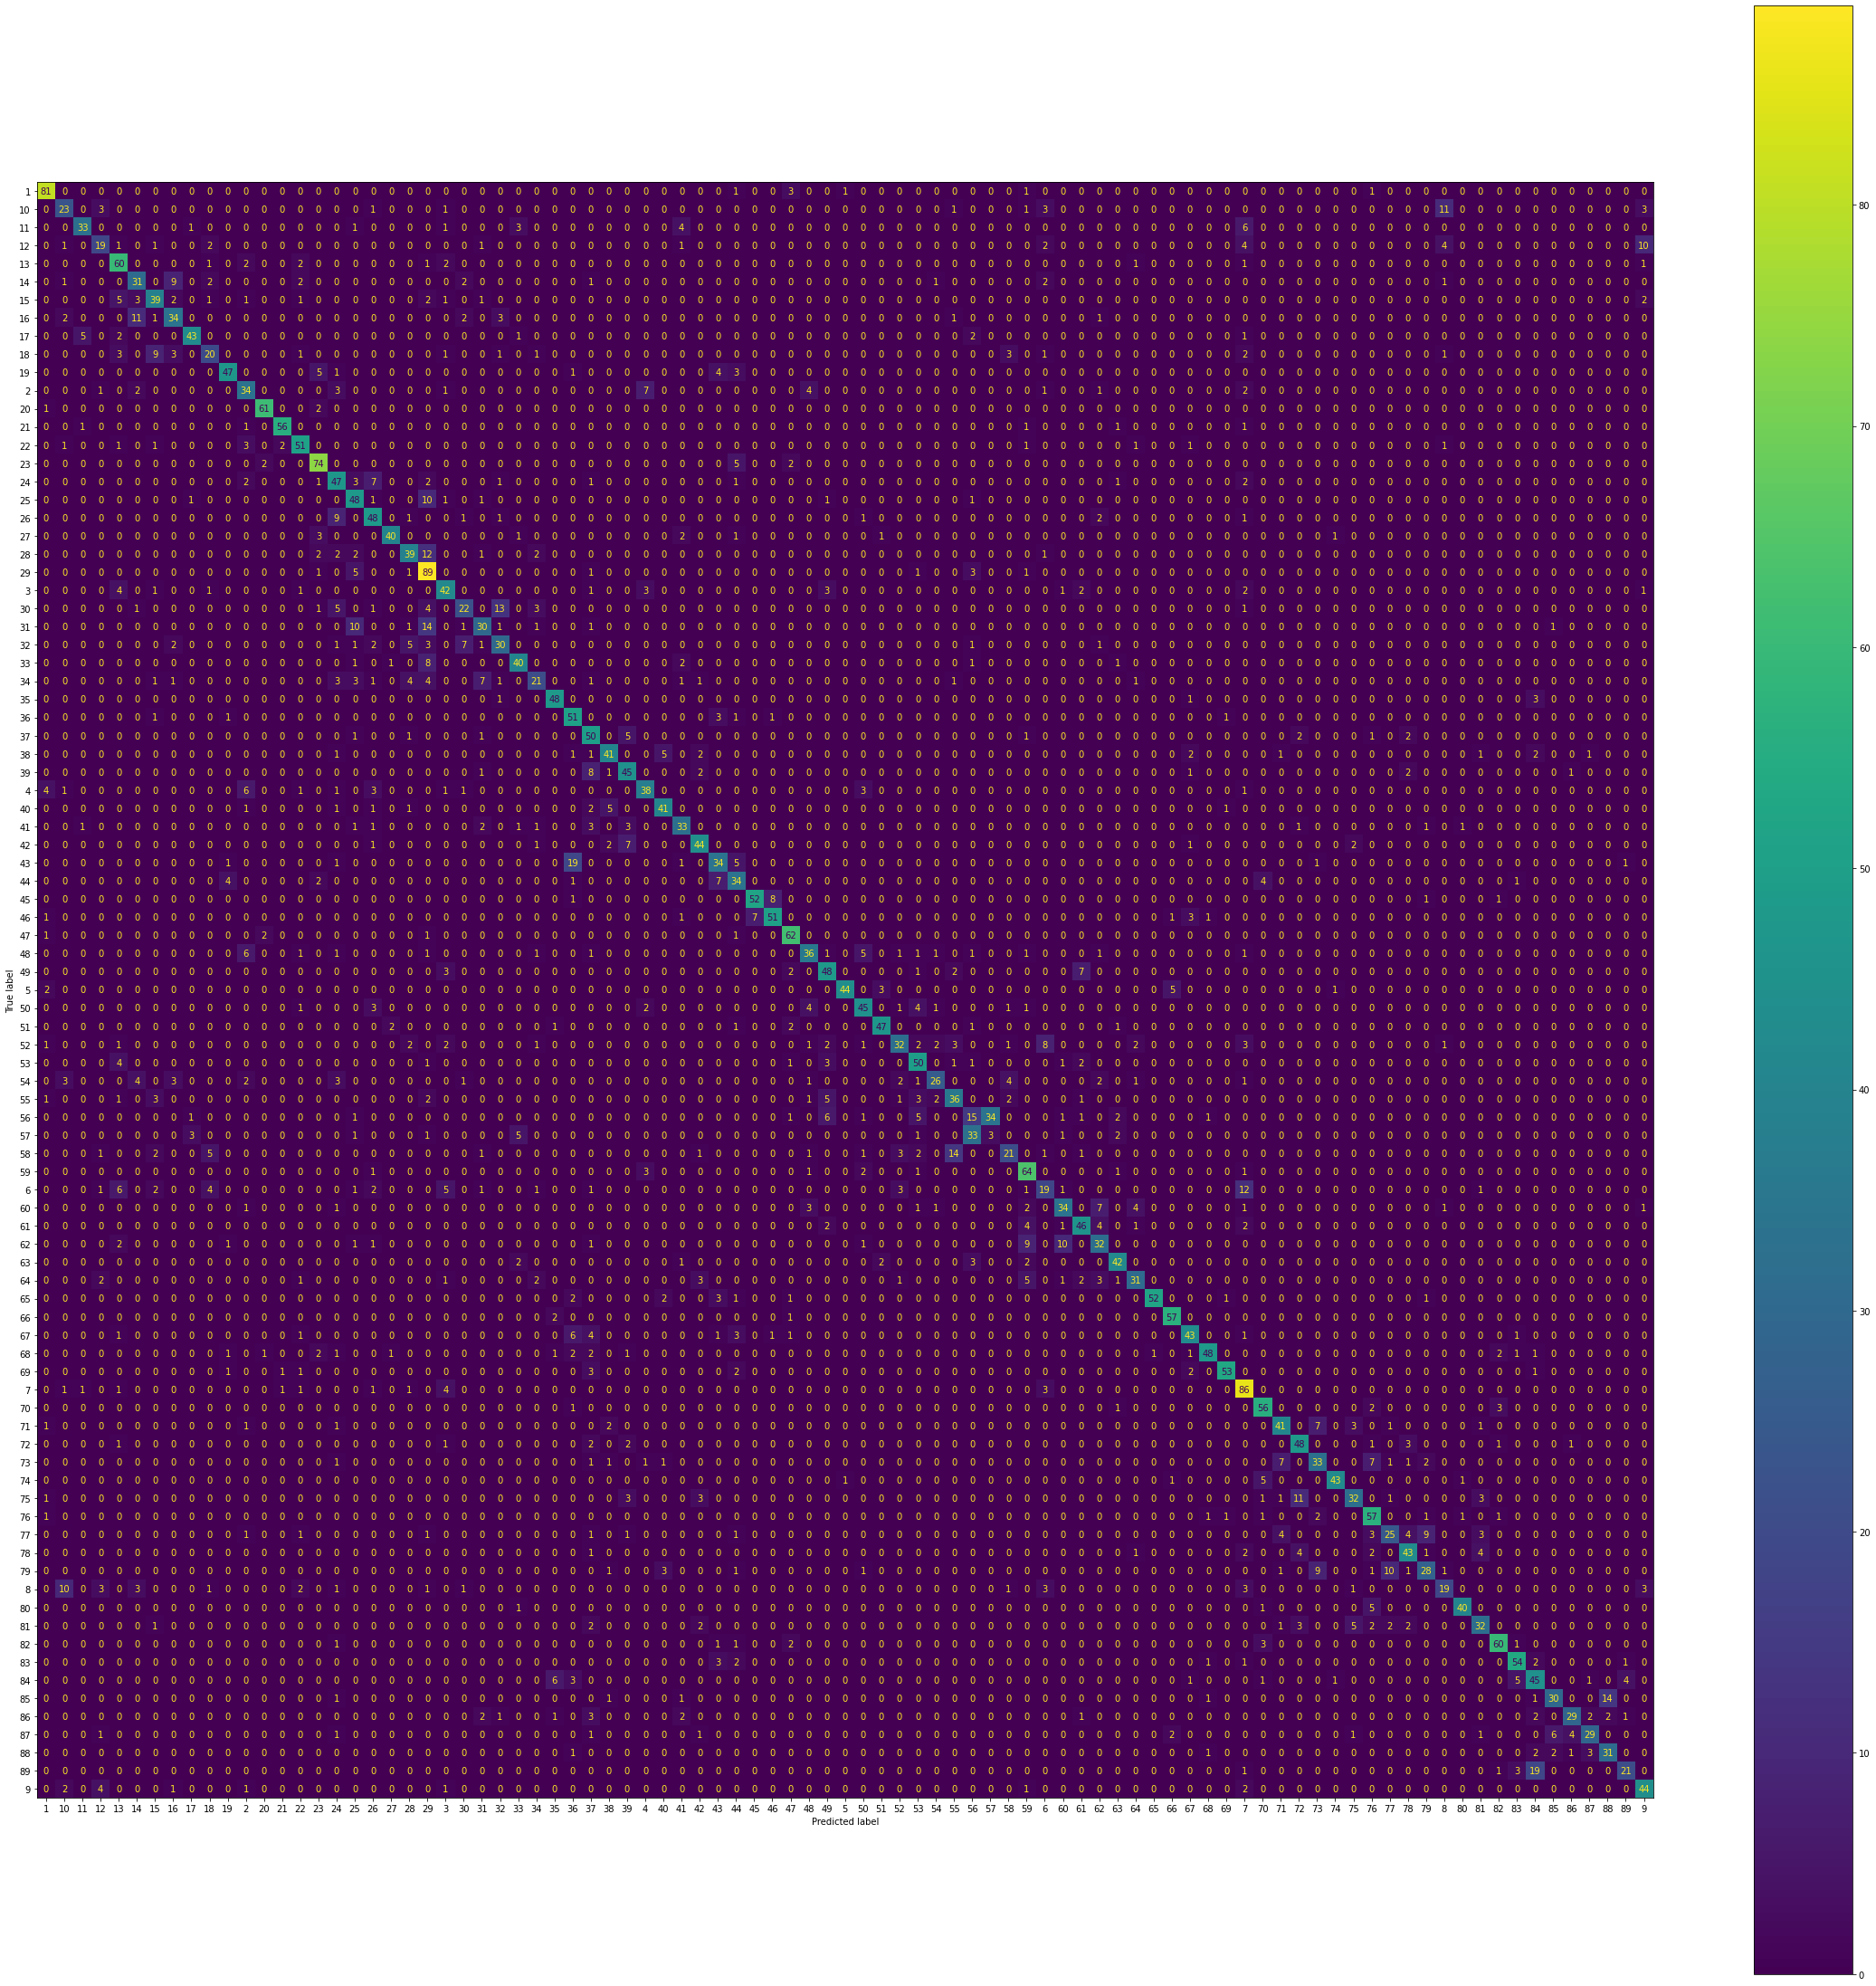

              precision    recall  f1-score   support

           1       0.85      0.92      0.89        88
          10       0.51      0.49      0.50        47
          11       0.80      0.67      0.73        49
          12       0.54      0.41      0.47        46
          13       0.65      0.85      0.73        71
          14       0.56      0.60      0.58        52
          15       0.63      0.67      0.65        58
          16       0.62      0.62      0.62        55
          17       0.88      0.80      0.83        54
          18       0.54      0.43      0.48        46
          19       0.84      0.77      0.80        61
           2       0.55      0.61      0.58        56
          20       0.92      0.95      0.94        64
          21       0.93      0.92      0.93        61
          22       0.75      0.81      0.78        63
          23       0.80      0.89      0.84        83
          24       0.54      0.69      0.61        68
          25       0.60    

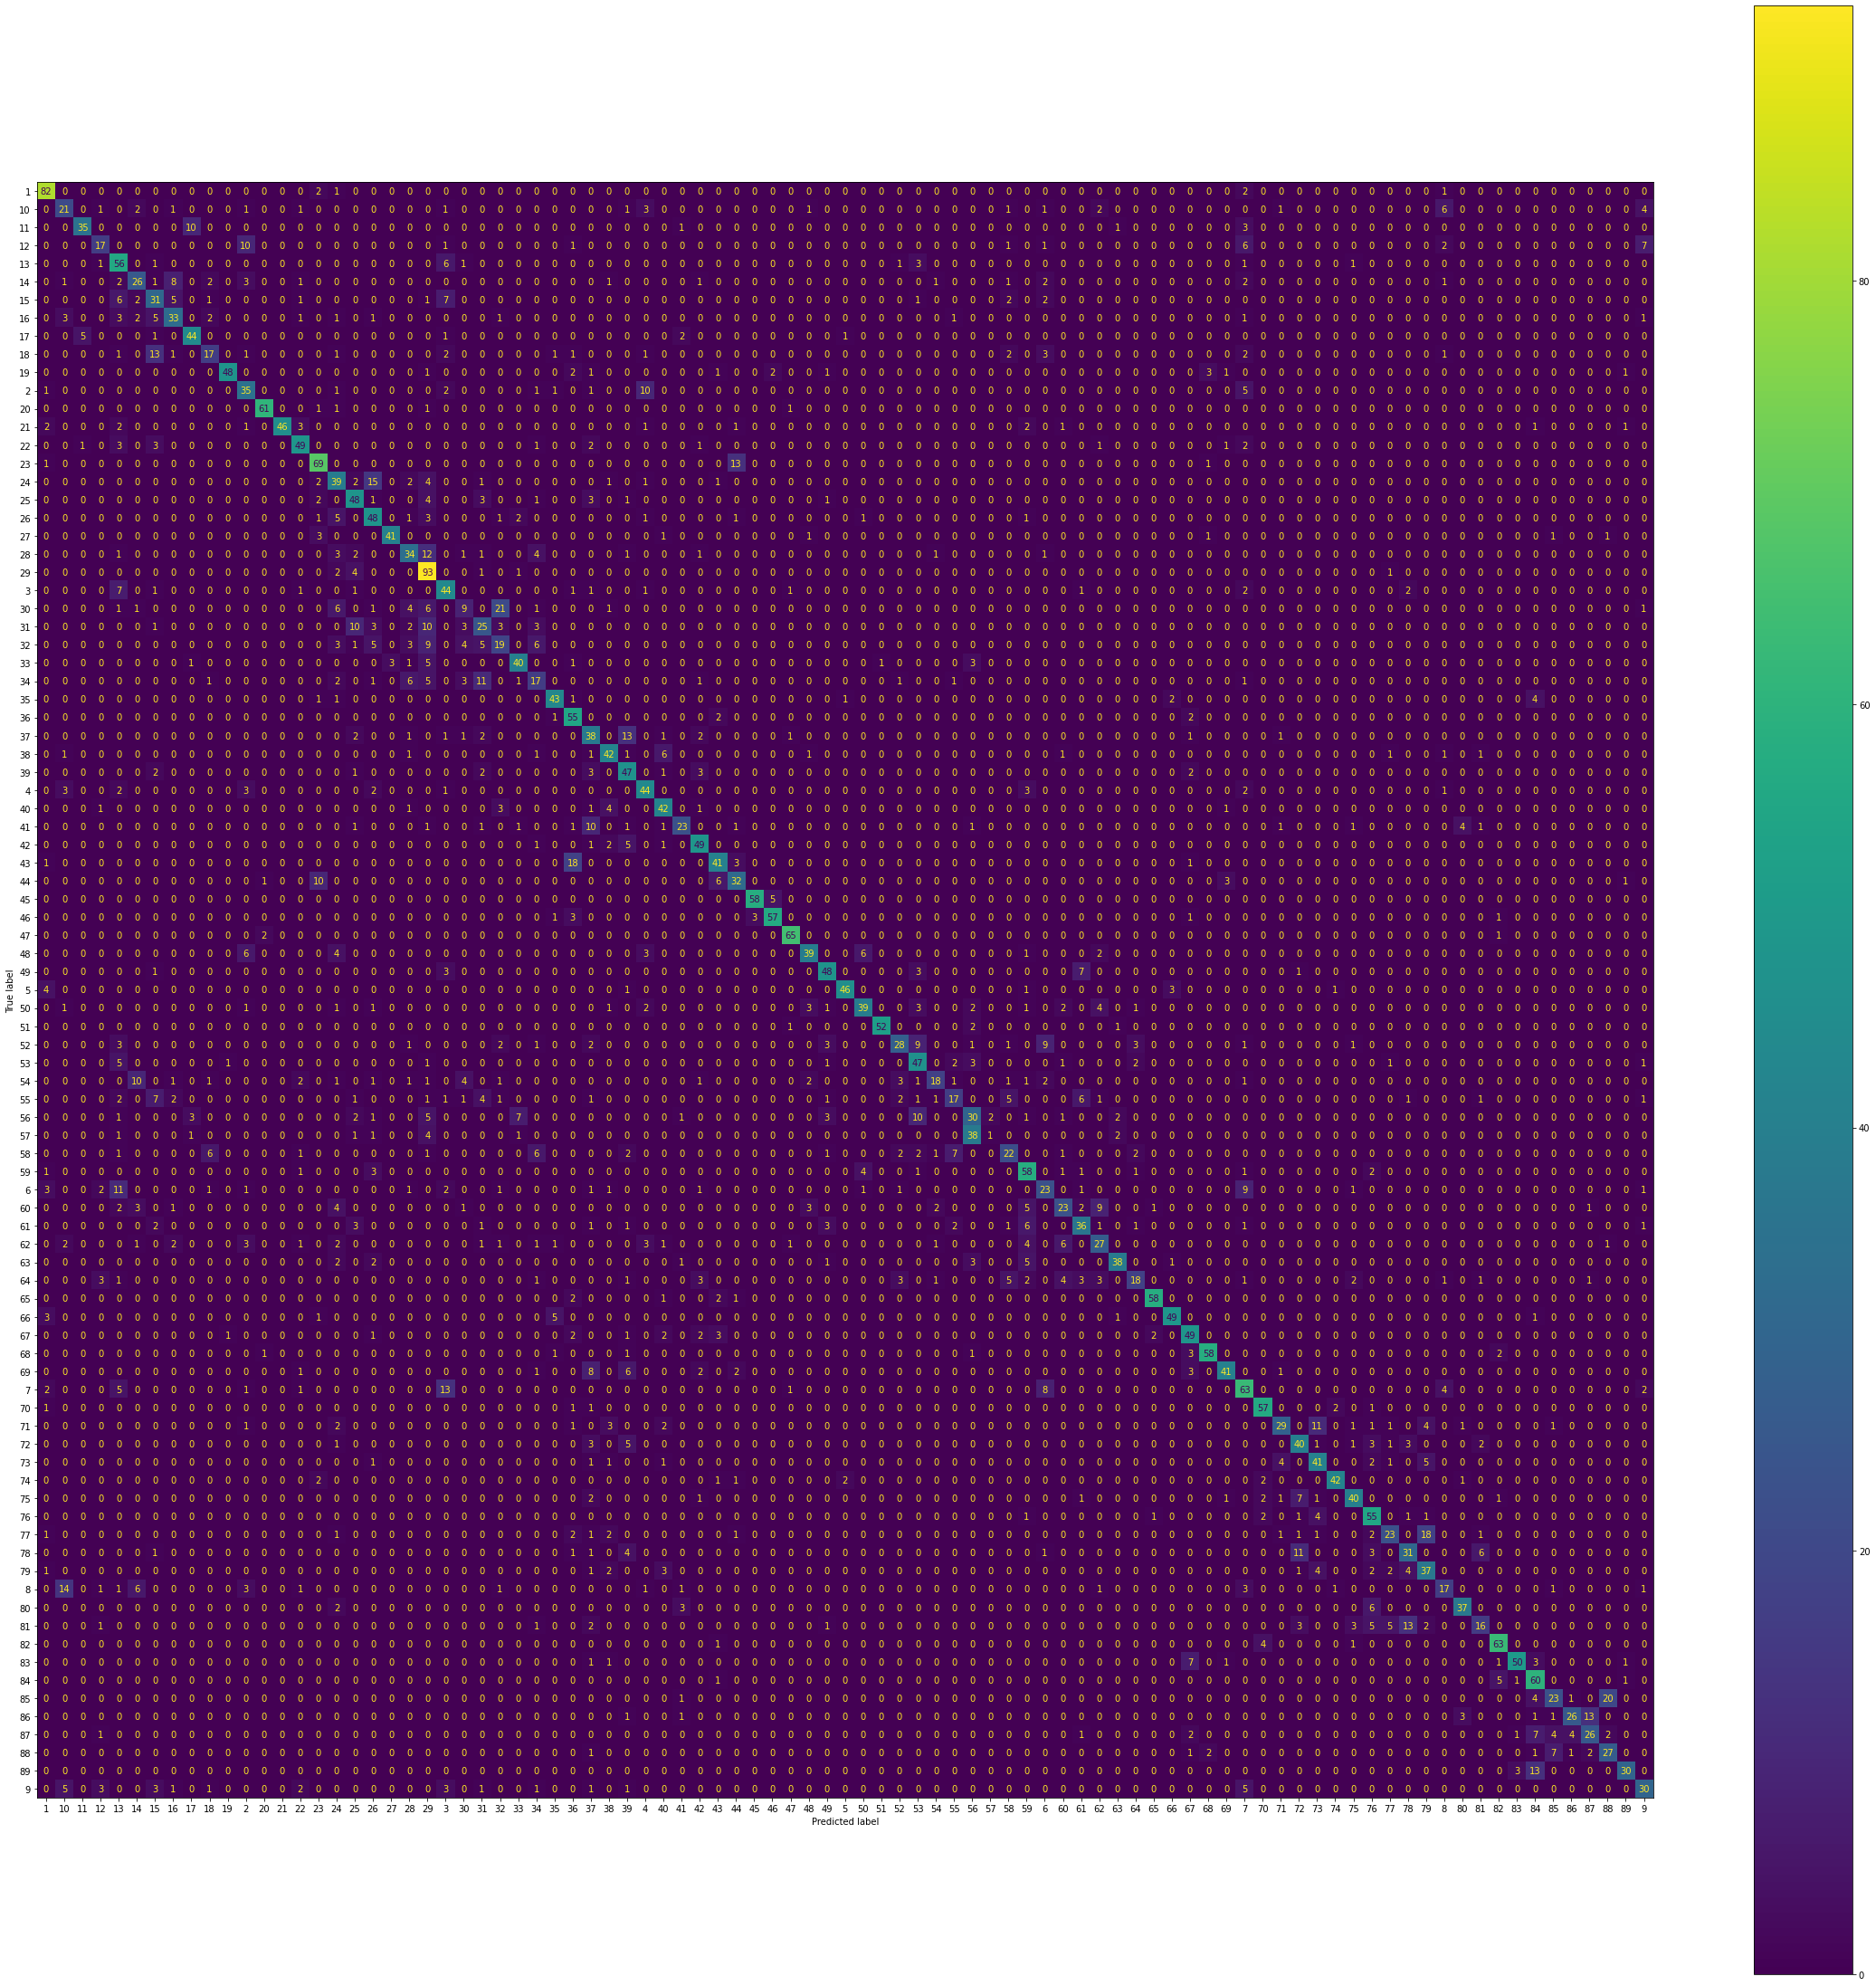

              precision    recall  f1-score   support

           1       0.80      0.93      0.86        88
          10       0.41      0.44      0.42        48
          11       0.85      0.70      0.77        50
          12       0.55      0.37      0.44        46
          13       0.48      0.79      0.60        71
          14       0.49      0.49      0.49        53
          15       0.42      0.53      0.47        59
          16       0.60      0.60      0.60        55
          17       0.75      0.81      0.78        54
          18       0.53      0.36      0.43        47
          19       0.96      0.79      0.86        61
           2       0.50      0.61      0.55        57
          20       0.94      0.94      0.94        65
          21       1.00      0.75      0.86        61
          22       0.73      0.77      0.75        64
          23       0.73      0.82      0.78        84
          24       0.45      0.57      0.51        68
          25       0.61    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

**Radial Basis Function Kernel**

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=8,kernel='rbf')
clf.fit(X_train, Y_train)
y_pred_vali = clf.predict(X_vali)
y_pred_test = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.6928909952606636


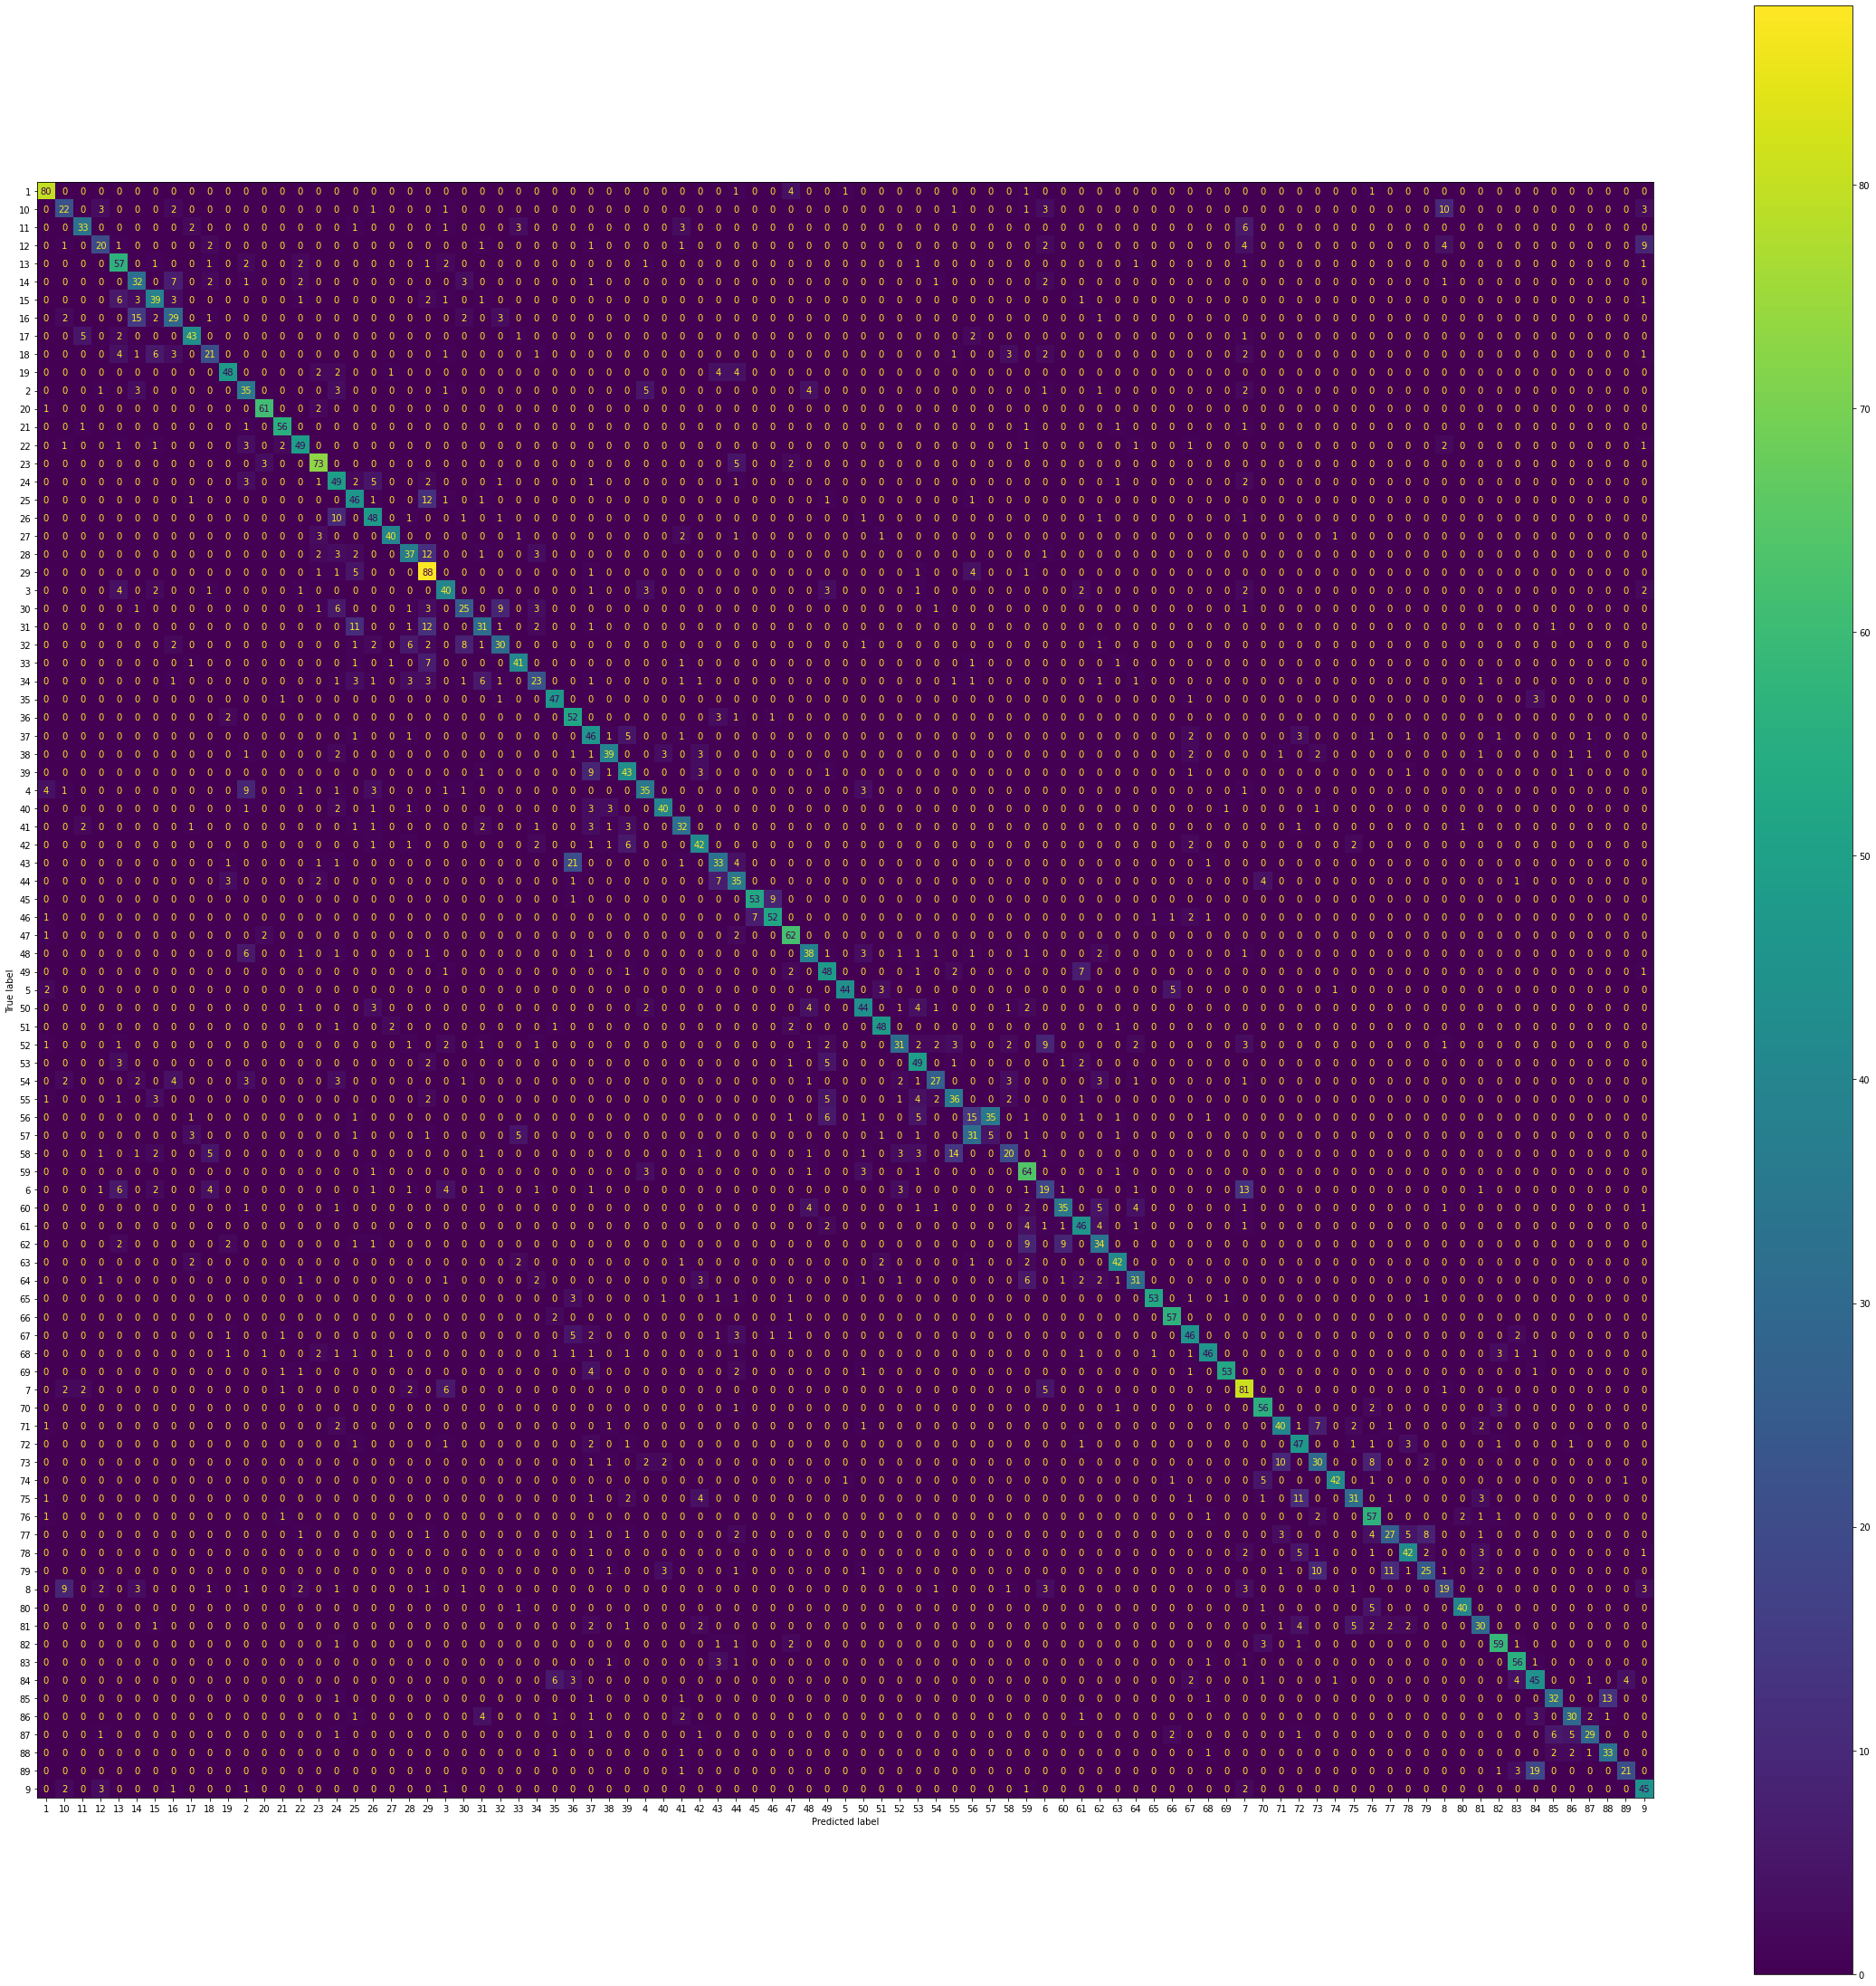

              precision    recall  f1-score   support

           1       0.85      0.91      0.88        88
          10       0.52      0.47      0.49        47
          11       0.77      0.67      0.72        49
          12       0.61      0.43      0.51        46
          13       0.65      0.80      0.72        71
          14       0.52      0.62      0.57        52
          15       0.66      0.67      0.67        58
          16       0.56      0.53      0.54        55
          17       0.80      0.80      0.80        54
          18       0.55      0.46      0.50        46
          19       0.83      0.79      0.81        61
           2       0.51      0.62      0.56        56
          20       0.91      0.95      0.93        64
          21       0.89      0.92      0.90        61
          22       0.78      0.78      0.78        63
          23       0.81      0.88      0.84        83
          24       0.52      0.72      0.60        68
          25       0.57    

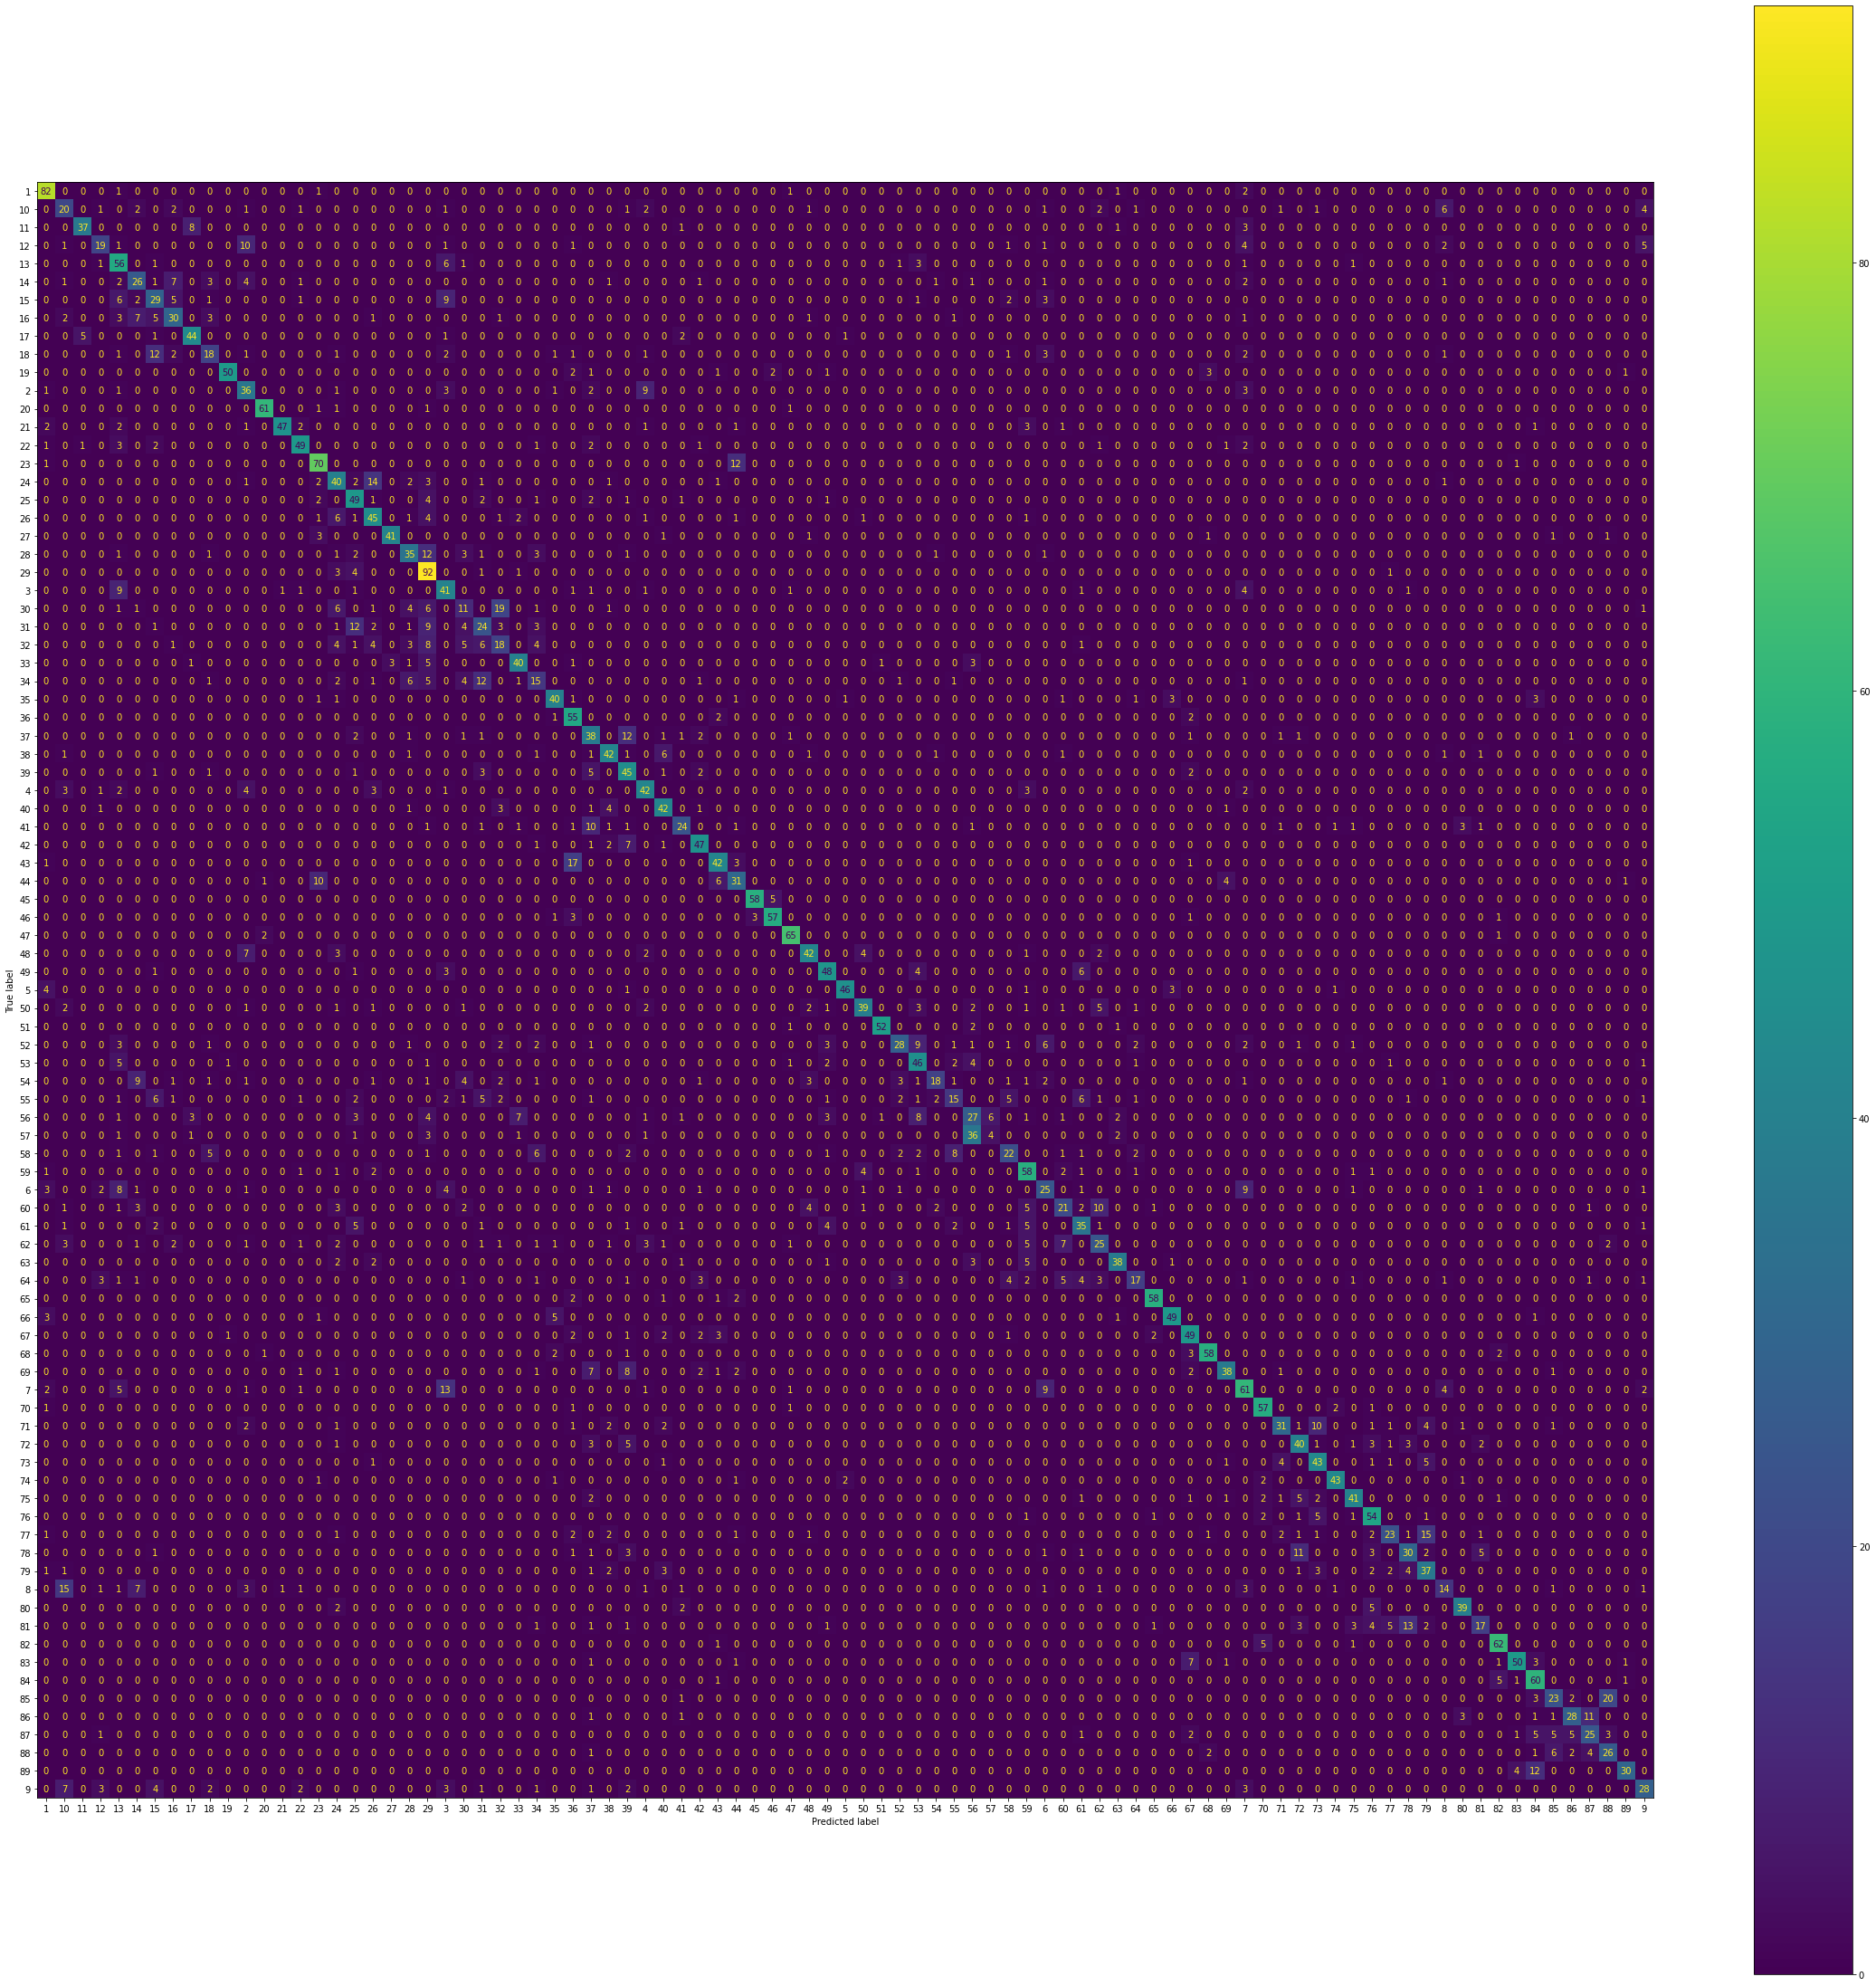

              precision    recall  f1-score   support

           1       0.79      0.93      0.85        88
          10       0.34      0.42      0.38        48
          11       0.86      0.74      0.80        50
          12       0.58      0.41      0.48        46
          13       0.48      0.79      0.60        71
          14       0.43      0.49      0.46        53
          15       0.43      0.49      0.46        59
          16       0.59      0.55      0.57        55
          17       0.77      0.81      0.79        54
          18       0.49      0.38      0.43        47
          19       0.96      0.82      0.88        61
           2       0.48      0.63      0.55        57
          20       0.94      0.94      0.94        65
          21       0.96      0.77      0.85        61
          22       0.78      0.77      0.77        64
          23       0.75      0.83      0.79        84
          24       0.47      0.59      0.52        68
          25       0.56    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
cm = plot_confusion_matrix(clf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
cm = plot_confusion_matrix(clf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

**Sử dụng model MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
Y_vali = Y_vali.ravel()

In [ ]:
MLP1_hog = MLPClassifier(hidden_layer_sizes=(1000), max_iter=500)
MLP1_hog.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1000, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print(accuracy_score(Y_vali, MLP1_hog.predict(X_vali)))

0.6650236966824644


In [ ]:
print(accuracy_score(Y_test, MLP1_hog.predict(X_test)))

0.6263860176658523


In [ ]:
MLP2_hog = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=500)
MLP2_hog.fit(X_train, Y_train)
print(accuracy_score(Y_vali, MLP2_hog.predict(X_vali)))

0.6909952606635071


In [ ]:
print(classification_report(Y_test, MLP2_hog.predict(X_test),target_names=labels))

              precision    recall  f1-score   support

           1       0.85      0.82      0.83        88
          10       0.52      0.48      0.50        48
          11       0.88      0.74      0.80        50
          12       0.45      0.46      0.45        46
          13       0.72      0.77      0.75        71
          14       0.64      0.40      0.49        53
          15       0.61      0.61      0.61        59
          16       0.57      0.65      0.61        55
          17       0.80      0.83      0.82        54
          18       0.63      0.57      0.60        47
          19       0.93      0.69      0.79        61
           2       0.76      0.65      0.70        57
          20       0.95      0.94      0.95        65
          21       0.90      0.75      0.82        61
          22       0.80      0.69      0.74        64
          23       0.78      0.82      0.80        84
          24       0.65      0.69      0.67        68
          25       0.59    

In [ ]:
label_dict = dict()
with open('/content/drive/MyDrive/Dataset/KiTu_So.txt', 'r') as f:
  lines = f.readlines()
for line in lines:
  l = line.split()
  label_dict[int(l[0])] = l[1]
print('label tương ứng: ')
print(label_dict)

label tương ứng: 
{1: 'a', 2: 'á', 3: 'à', 4: 'ả', 5: 'ạ', 6: 'ã', 7: 'ă', 8: 'ắ', 9: 'ằ', 10: 'ẳ', 11: 'ặ', 12: 'ẵ', 13: 'â', 14: 'ấ', 15: 'ầ', 16: 'ẩ', 17: 'ậ', 18: 'ẫ', 19: 'b', 20: 'c', 21: 'd', 22: 'đ', 23: 'e', 24: 'é', 25: 'è', 26: 'ẻ', 27: 'ẹ', 28: 'ẽ', 29: 'ê', 30: 'ế', 31: 'ề', 32: 'ể', 33: 'ệ', 34: 'ễ', 35: 'g', 36: 'h', 37: 'i', 38: 'í', 39: 'ì', 40: 'ỉ', 41: 'ị', 42: 'ĩ', 43: 'k', 44: 'l', 45: 'm', 46: 'n', 47: 'o', 48: 'ó', 49: 'ò', 50: 'ỏ', 51: 'ọ', 52: 'õ', 53: 'ô', 54: 'ố', 55: 'ồ', 56: 'ổ', 57: 'ộ', 58: 'ỗ', 59: 'ơ', 60: 'ớ', 61: 'ờ', 62: 'ở', 63: 'ợ', 64: 'ỡ', 65: 'p', 66: 'q', 67: 'r', 68: 's', 69: 't', 70: 'u', 71: 'ú', 72: 'ù', 73: 'ủ', 74: 'ụ', 75: 'ũ', 76: 'ư', 77: 'ứ', 78: 'ừ', 79: 'ử', 80: 'ự', 81: 'ữ', 82: 'v', 83: 'x', 84: 'y', 85: 'ý', 86: 'ỳ', 87: 'ỹ', 88: 'ỷ', 89: 'ỵ'}
